# RIT AI for Engineers

In [9]:
''' Install Packages to Set-up Environment '''
!pip install gymnasium
!pip install ale-py
!pip install pyvirtualdisplay
!pip install matplotlib
!pip install torch
!pip install stable-baselines3[extra]
!pip install sb3_contrib
!pip install swig
!pip install gymnasium[box2d]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 kB 2.3 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import ale_py
from IPython.display import Video

# Create Lunar Lander environment
env = gym.make('LunarLander-v3', render_mode="rgb_array")

# Set up to record a video
env = RecordVideo(env, video_folder='./video', name_prefix='Test')

# Reset the environment
env.reset()

# Run the environment until done
terminated = False
truncated = False

while not (terminated or truncated):
    action = env.action_space.sample()  # Randomly choose an action
    obs, reward, terminated, truncated, info = env.step(action) # Steps the environment

env.close() # Good practice to always close the environment after completion

# Display the video within the notebook
Video("./video/Test-episode-0.mp4", embed=True)

## Understanding Your Environment

1. Action Space: What actions our agents can take. In this case, it seems to be, 0: do nothing, 1: fire left orientation engine, 2: fire main engine, 3: fire right orientation engine.
2. Observation Space: What our observations may look like. Typically, gymnasium works on the Box class and returns (low limits, high limits, vector shape, object type). In this case, it seems to be a an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.
3. Max episodes steps: How long our environment can run before ending
4. Reward threshold: Required cummalitive rewards to solve the environment

In [3]:
import gymnasium as gym

''' Defining a Function to Query the Environment '''
def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Reward Threshold: {spec.reward_threshold}")

query_environment('LunarLander-v3')

Action Space: Discrete(4)
Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Max Episode Steps: 1000
Reward Threshold: 200


### The Lunar Lander Environment

-   `observation` is an array of 4 floats:
    - The x position and velocity of the cart
    - The angular position and velocity of the pole

-   `action` is a scalar integer with only two possible values:
    -   `0` — "do nothing"
    -   `1` — "fire left orientation engine"
    -   `2` — "fire main engine"
    -   `3` — "fire right orientation engine"

-   `reward` is a scalar float value. For each step, the reward is +1


An episode is considered a solution if it scores at least 475 points.



array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
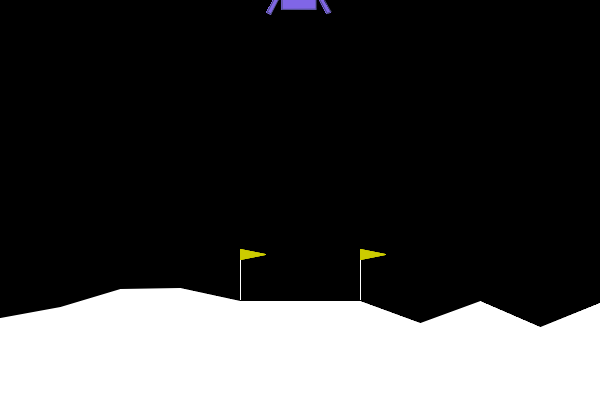

In [4]:
''' Lets create our environment and see a visual of it '''
env    = gym.make('LunarLander-v3', render_mode='rgb_array') # Render mode allows us to specify how we see the environment
obs, _ = env.reset()
env.render()

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
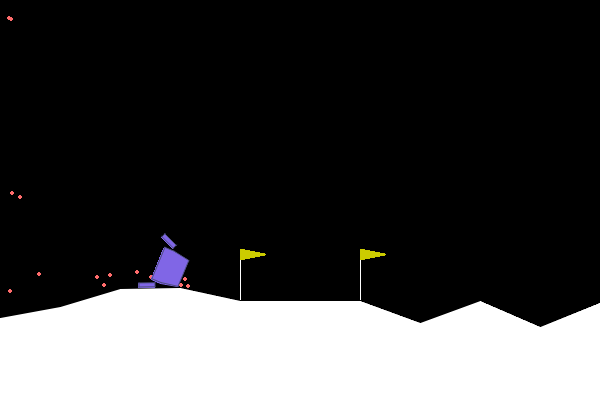

In [5]:
''' Lets step our environment with an action until the episode ends'''
action = 1
done = False
while not done:
  obs, reward, terminated, truncated, info = env.step(action)
  done = terminated or truncated
env.render()

The lunar lander has crashed, which makes the episode terminate.

## Stable-Baselines 3
Now we are going to use a state of the art library that has implemented multiple types of agents for us.

In [58]:
hyperparameters = {
  'policy': 'MlpPolicy',
  'learning_rate': 6.3e-4,
  'batch_size': 256,
  'buffer_size': 50000,
  'learning_starts': 0,
  'gamma': 0.99,
  'target_update_interval': 250,
  'train_freq': 4,
  'gradient_steps': -1,
  'exploration_fraction': 0.12,
  'exploration_final_eps': 0.10,
  'policy_kwargs': dict(net_arch=[256, 256])
}

In [59]:
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import os

eval_log_dir = "./eval_logs/" # Create log directory
os.makedirs(eval_log_dir, exist_ok=True) # ensure directory exists

''' Make our Training Environment '''
env = gym.make('LunarLander-v3')
# Wrap our environment in a monitor function to track results
env = Monitor(env, eval_log_dir)
# Create our DQN agent
agent = DQN(env=env, verbose=1, **hyperparameters)

'''Create our evalualation environment different from our train environment'''

# Create a fresh environment for evaluation
eval_env = gym.make('LunarLander-v3')

# Set up Call-Backs: Stopped when solved and save best model
callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=500, verbose=1)
eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir,
                              log_path=eval_log_dir, eval_freq=100,
                              callback_on_new_best=callback_on_best,
                              n_eval_episodes=5, deterministic=True,
                              render=False)

# Train our agent for 100K timesteps max
agent.learn(total_timesteps=10e4, log_interval=100, callback=eval_callback)

Using cpu device
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=100, episode_reward=-641.93 +/- 108.01
Episode length: 71.00 +/- 8.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 71       |
|    mean_reward      | -642     |
| rollout/            |          |
|    exploration_rate | 0.993    |
| time/               |          |
|    total_timesteps  | 100      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.328    |
|    n_updates        | 96       |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=200, episode_reward=-631.95 +/- 47.64
Episode length: 73.60 +/- 12.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 73.6     |
|    mean_reward      | -632     |
| rollout/            |          |
|    exploration_rate | 0.985    |
| time/               |          |
|    total_timesteps  | 200      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.814    |
|    n_updates        | 196      |
----------------------------------
New best mean reward!
Eval num_timesteps=300, episode_reward=-138.43 +/- 125.12
Episode length: 282.00 +/- 76.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 282      |
|    mean_reward      | -138     |
| rollout/            |          |
|    exploration_rate | 0.978    |
| time/               |          |
|    total_timesteps  | 300      |
| train/              |          |
|    learning_rate    | 0.00

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=400, episode_reward=-391.57 +/- 92.31
Episode length: 238.80 +/- 68.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 239      |
|    mean_reward      | -392     |
| rollout/            |          |
|    exploration_rate | 0.97     |
| time/               |          |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.69     |
|    n_updates        | 396      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=500, episode_reward=-271.59 +/- 115.80
Episode length: 271.40 +/- 110.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 271      |
|    mean_reward      | -272     |
| rollout/            |          |
|    exploration_rate | 0.963    |
| time/               |          |
|    total_timesteps  | 500      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 496      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=600, episode_reward=-206.51 +/- 96.29
Episode length: 332.00 +/- 338.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 332      |
|    mean_reward      | -207     |
| rollout/            |          |
|    exploration_rate | 0.955    |
| time/               |          |
|    total_timesteps  | 600      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.3      |
|    n_updates        | 596      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=700, episode_reward=-282.88 +/- 65.26
Episode length: 252.60 +/- 180.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 253      |
|    mean_reward      | -283     |
| rollout/            |          |
|    exploration_rate | 0.948    |
| time/               |          |
|    total_timesteps  | 700      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.45     |
|    n_updates        | 696      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=800, episode_reward=-251.79 +/- 125.58
Episode length: 176.60 +/- 26.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 177      |
|    mean_reward      | -252     |
| rollout/            |          |
|    exploration_rate | 0.94     |
| time/               |          |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 796      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=900, episode_reward=-259.86 +/- 92.05
Episode length: 887.60 +/- 216.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 888      |
|    mean_reward      | -260     |
| rollout/            |          |
|    exploration_rate | 0.933    |
| time/               |          |
|    total_timesteps  | 900      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.35     |
|    n_updates        | 896      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=-177.87 +/- 55.38
Episode length: 834.80 +/- 330.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 835      |
|    mean_reward      | -178     |
| rollout/            |          |
|    exploration_rate | 0.925    |
| time/               |          |
|    total_timesteps  | 1000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.06     |
|    n_updates        | 996      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1100, episode_reward=-191.00 +/- 19.60
Episode length: 843.00 +/- 314.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 843      |
|    mean_reward      | -191     |
| rollout/            |          |
|    exploration_rate | 0.918    |
| time/               |          |
|    total_timesteps  | 1100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.983    |
|    n_updates        | 1096     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1200, episode_reward=-181.84 +/- 8.57
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -182     |
| rollout/            |          |
|    exploration_rate | 0.91     |
| time/               |          |
|    total_timesteps  | 1200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 1196     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1300, episode_reward=-241.37 +/- 163.60
Episode length: 834.20 +/- 331.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 834      |
|    mean_reward      | -241     |
| rollout/            |          |
|    exploration_rate | 0.903    |
| time/               |          |
|    total_timesteps  | 1300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.66     |
|    n_updates        | 1296     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1400, episode_reward=-301.36 +/- 228.41
Episode length: 833.40 +/- 333.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 833      |
|    mean_reward      | -301     |
| rollout/            |          |
|    exploration_rate | 0.895    |
| time/               |          |
|    total_timesteps  | 1400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.66     |
|    n_updates        | 1396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1500, episode_reward=-198.38 +/- 13.80
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -198     |
| rollout/            |          |
|    exploration_rate | 0.888    |
| time/               |          |
|    total_timesteps  | 1500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 1496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1600, episode_reward=-162.44 +/- 24.44
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -162     |
| rollout/            |          |
|    exploration_rate | 0.88     |
| time/               |          |
|    total_timesteps  | 1600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.688    |
|    n_updates        | 1596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1700, episode_reward=-163.05 +/- 17.56
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -163     |
| rollout/            |          |
|    exploration_rate | 0.873    |
| time/               |          |
|    total_timesteps  | 1700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 1696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1800, episode_reward=-207.63 +/- 14.94
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -208     |
| rollout/            |          |
|    exploration_rate | 0.865    |
| time/               |          |
|    total_timesteps  | 1800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.67     |
|    n_updates        | 1796     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1900, episode_reward=-263.42 +/- 14.59
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -263     |
| rollout/            |          |
|    exploration_rate | 0.858    |
| time/               |          |
|    total_timesteps  | 1900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 1896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2000, episode_reward=-199.38 +/- 13.58
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -199     |
| rollout/            |          |
|    exploration_rate | 0.85     |
| time/               |          |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.36     |
|    n_updates        | 1996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2100, episode_reward=-377.76 +/- 66.54
Episode length: 963.40 +/- 59.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 963      |
|    mean_reward      | -378     |
| rollout/            |          |
|    exploration_rate | 0.843    |
| time/               |          |
|    total_timesteps  | 2100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.75     |
|    n_updates        | 2096     |
----------------------------------
Eval num_timesteps=2200, episode_reward=-360.79 +/- 56.25
Episode length: 977.20 +/- 45.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 977      |
|    mean_reward      | -361     |
| rollout/            |          |
|    exploration_rate | 0.835    |
| time/               |          |
|    total_timesteps  | 2200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss    

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2300, episode_reward=-375.61 +/- 64.16
Episode length: 990.40 +/- 19.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 990      |
|    mean_reward      | -376     |
| rollout/            |          |
|    exploration_rate | 0.828    |
| time/               |          |
|    total_timesteps  | 2300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.43     |
|    n_updates        | 2296     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2400, episode_reward=-410.46 +/- 17.96
Episode length: 634.00 +/- 45.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 634      |
|    mean_reward      | -410     |
| rollout/            |          |
|    exploration_rate | 0.82     |
| time/               |          |
|    total_timesteps  | 2400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.76     |
|    n_updates        | 2396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2500, episode_reward=-394.32 +/- 20.35
Episode length: 562.20 +/- 47.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 562      |
|    mean_reward      | -394     |
| rollout/            |          |
|    exploration_rate | 0.813    |
| time/               |          |
|    total_timesteps  | 2500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.67     |
|    n_updates        | 2496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2600, episode_reward=-337.02 +/- 24.83
Episode length: 525.00 +/- 107.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 525      |
|    mean_reward      | -337     |
| rollout/            |          |
|    exploration_rate | 0.805    |
| time/               |          |
|    total_timesteps  | 2600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.85     |
|    n_updates        | 2596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2700, episode_reward=-446.94 +/- 18.65
Episode length: 810.80 +/- 71.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 811      |
|    mean_reward      | -447     |
| rollout/            |          |
|    exploration_rate | 0.798    |
| time/               |          |
|    total_timesteps  | 2700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.87     |
|    n_updates        | 2696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2800, episode_reward=-399.14 +/- 50.96
Episode length: 637.00 +/- 177.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 637      |
|    mean_reward      | -399     |
| rollout/            |          |
|    exploration_rate | 0.79     |
| time/               |          |
|    total_timesteps  | 2800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.14     |
|    n_updates        | 2796     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2900, episode_reward=-408.29 +/- 16.34
Episode length: 649.80 +/- 93.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 650      |
|    mean_reward      | -408     |
| rollout/            |          |
|    exploration_rate | 0.783    |
| time/               |          |
|    total_timesteps  | 2900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.21     |
|    n_updates        | 2896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3000, episode_reward=-363.54 +/- 23.33
Episode length: 422.20 +/- 42.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 422      |
|    mean_reward      | -364     |
| rollout/            |          |
|    exploration_rate | 0.775    |
| time/               |          |
|    total_timesteps  | 3000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2        |
|    n_updates        | 2996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3100, episode_reward=-402.97 +/- 16.84
Episode length: 731.80 +/- 153.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 732      |
|    mean_reward      | -403     |
| rollout/            |          |
|    exploration_rate | 0.768    |
| time/               |          |
|    total_timesteps  | 3100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.26     |
|    n_updates        | 3096     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3200, episode_reward=-354.60 +/- 9.44
Episode length: 398.40 +/- 61.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 398      |
|    mean_reward      | -355     |
| rollout/            |          |
|    exploration_rate | 0.76     |
| time/               |          |
|    total_timesteps  | 3200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.42     |
|    n_updates        | 3196     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3300, episode_reward=-388.58 +/- 23.65
Episode length: 395.00 +/- 66.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 395      |
|    mean_reward      | -389     |
| rollout/            |          |
|    exploration_rate | 0.753    |
| time/               |          |
|    total_timesteps  | 3300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.14     |
|    n_updates        | 3296     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3400, episode_reward=-383.29 +/- 30.66
Episode length: 304.20 +/- 42.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 304      |
|    mean_reward      | -383     |
| rollout/            |          |
|    exploration_rate | 0.745    |
| time/               |          |
|    total_timesteps  | 3400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.27     |
|    n_updates        | 3396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3500, episode_reward=-390.48 +/- 41.76
Episode length: 411.80 +/- 83.06
----------------------------------
| eval/               |          |
|    mean_ep_length   | 412      |
|    mean_reward      | -390     |
| rollout/            |          |
|    exploration_rate | 0.738    |
| time/               |          |
|    total_timesteps  | 3500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.32     |
|    n_updates        | 3496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3600, episode_reward=-399.67 +/- 47.65
Episode length: 402.00 +/- 63.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 402      |
|    mean_reward      | -400     |
| rollout/            |          |
|    exploration_rate | 0.73     |
| time/               |          |
|    total_timesteps  | 3600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.85     |
|    n_updates        | 3596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3700, episode_reward=-443.78 +/- 26.27
Episode length: 546.80 +/- 99.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 547      |
|    mean_reward      | -444     |
| rollout/            |          |
|    exploration_rate | 0.723    |
| time/               |          |
|    total_timesteps  | 3700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.13     |
|    n_updates        | 3696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3800, episode_reward=-413.18 +/- 27.93
Episode length: 454.20 +/- 67.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 454      |
|    mean_reward      | -413     |
| rollout/            |          |
|    exploration_rate | 0.715    |
| time/               |          |
|    total_timesteps  | 3800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.5      |
|    n_updates        | 3796     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3900, episode_reward=-541.90 +/- 74.22
Episode length: 549.60 +/- 83.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 550      |
|    mean_reward      | -542     |
| rollout/            |          |
|    exploration_rate | 0.708    |
| time/               |          |
|    total_timesteps  | 3900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.71     |
|    n_updates        | 3896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4000, episode_reward=-479.59 +/- 57.72
Episode length: 525.60 +/- 95.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 526      |
|    mean_reward      | -480     |
| rollout/            |          |
|    exploration_rate | 0.7      |
| time/               |          |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.61     |
|    n_updates        | 3996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4100, episode_reward=-447.81 +/- 39.42
Episode length: 548.20 +/- 61.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 548      |
|    mean_reward      | -448     |
| rollout/            |          |
|    exploration_rate | 0.693    |
| time/               |          |
|    total_timesteps  | 4100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.74     |
|    n_updates        | 4096     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4200, episode_reward=-563.23 +/- 60.82
Episode length: 628.80 +/- 59.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 629      |
|    mean_reward      | -563     |
| rollout/            |          |
|    exploration_rate | 0.685    |
| time/               |          |
|    total_timesteps  | 4200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.5      |
|    n_updates        | 4196     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4300, episode_reward=-1405.96 +/- 623.80
Episode length: 861.40 +/- 151.09
-----------------------------------
| eval/               |           |
|    mean_ep_length   | 861       |
|    mean_reward      | -1.41e+03 |
| rollout/            |           |
|    exploration_rate | 0.678     |
| time/               |           |
|    total_timesteps  | 4300      |
| train/              |           |
|    learning_rate    | 0.00063   |
|    loss             | 1.46      |
|    n_updates        | 4296      |
-----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4400, episode_reward=-1100.12 +/- 331.17
Episode length: 964.60 +/- 54.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 965      |
|    mean_reward      | -1.1e+03 |
| rollout/            |          |
|    exploration_rate | 0.67     |
| time/               |          |
|    total_timesteps  | 4400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.57     |
|    n_updates        | 4396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4500, episode_reward=-940.29 +/- 497.09
Episode length: 957.80 +/- 71.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 958      |
|    mean_reward      | -940     |
| rollout/            |          |
|    exploration_rate | 0.663    |
| time/               |          |
|    total_timesteps  | 4500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.3      |
|    n_updates        | 4496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4600, episode_reward=-477.06 +/- 47.71
Episode length: 567.40 +/- 151.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 567      |
|    mean_reward      | -477     |
| rollout/            |          |
|    exploration_rate | 0.655    |
| time/               |          |
|    total_timesteps  | 4600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 4596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4700, episode_reward=-626.25 +/- 76.66
Episode length: 841.20 +/- 120.03
----------------------------------
| eval/               |          |
|    mean_ep_length   | 841      |
|    mean_reward      | -626     |
| rollout/            |          |
|    exploration_rate | 0.648    |
| time/               |          |
|    total_timesteps  | 4700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.26     |
|    n_updates        | 4696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4800, episode_reward=-778.71 +/- 219.15
Episode length: 972.80 +/- 22.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 973      |
|    mean_reward      | -779     |
| rollout/            |          |
|    exploration_rate | 0.64     |
| time/               |          |
|    total_timesteps  | 4800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 4796     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4900, episode_reward=-536.67 +/- 149.58
Episode length: 940.80 +/- 81.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 941      |
|    mean_reward      | -537     |
| rollout/            |          |
|    exploration_rate | 0.633    |
| time/               |          |
|    total_timesteps  | 4900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.29     |
|    n_updates        | 4896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-296.05 +/- 118.76
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -296     |
| rollout/            |          |
|    exploration_rate | 0.625    |
| time/               |          |
|    total_timesteps  | 5000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.48     |
|    n_updates        | 4996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5100, episode_reward=-507.47 +/- 154.98
Episode length: 941.20 +/- 114.62
----------------------------------
| eval/               |          |
|    mean_ep_length   | 941      |
|    mean_reward      | -507     |
| rollout/            |          |
|    exploration_rate | 0.618    |
| time/               |          |
|    total_timesteps  | 5100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.52     |
|    n_updates        | 5096     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5200, episode_reward=-118.76 +/- 12.83
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -119     |
| rollout/            |          |
|    exploration_rate | 0.61     |
| time/               |          |
|    total_timesteps  | 5200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.55     |
|    n_updates        | 5196     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5300, episode_reward=-363.43 +/- 78.73
Episode length: 616.40 +/- 271.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 616      |
|    mean_reward      | -363     |
| rollout/            |          |
|    exploration_rate | 0.603    |
| time/               |          |
|    total_timesteps  | 5300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 5296     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5400, episode_reward=-196.65 +/- 36.59
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -197     |
| rollout/            |          |
|    exploration_rate | 0.595    |
| time/               |          |
|    total_timesteps  | 5400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 5396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5500, episode_reward=-359.44 +/- 97.82
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -359     |
| rollout/            |          |
|    exploration_rate | 0.588    |
| time/               |          |
|    total_timesteps  | 5500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.42     |
|    n_updates        | 5496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5600, episode_reward=-237.54 +/- 45.22
Episode length: 852.40 +/- 295.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 852      |
|    mean_reward      | -238     |
| rollout/            |          |
|    exploration_rate | 0.58     |
| time/               |          |
|    total_timesteps  | 5600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 5596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5700, episode_reward=-191.35 +/- 29.64
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -191     |
| rollout/            |          |
|    exploration_rate | 0.573    |
| time/               |          |
|    total_timesteps  | 5700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.41     |
|    n_updates        | 5696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5800, episode_reward=-167.82 +/- 42.28
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -168     |
| rollout/            |          |
|    exploration_rate | 0.565    |
| time/               |          |
|    total_timesteps  | 5800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.67     |
|    n_updates        | 5796     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5900, episode_reward=-252.97 +/- 83.58
Episode length: 678.40 +/- 393.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 678      |
|    mean_reward      | -253     |
| rollout/            |          |
|    exploration_rate | 0.558    |
| time/               |          |
|    total_timesteps  | 5900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 5896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6000, episode_reward=-162.34 +/- 11.73
Episode length: 852.40 +/- 295.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 852      |
|    mean_reward      | -162     |
| rollout/            |          |
|    exploration_rate | 0.55     |
| time/               |          |
|    total_timesteps  | 6000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.44     |
|    n_updates        | 5996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6100, episode_reward=-170.08 +/- 28.58
Episode length: 896.40 +/- 207.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 896      |
|    mean_reward      | -170     |
| rollout/            |          |
|    exploration_rate | 0.543    |
| time/               |          |
|    total_timesteps  | 6100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.41     |
|    n_updates        | 6096     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6200, episode_reward=-225.14 +/- 58.38
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -225     |
| rollout/            |          |
|    exploration_rate | 0.535    |
| time/               |          |
|    total_timesteps  | 6200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 6196     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6300, episode_reward=-143.58 +/- 22.61
Episode length: 669.60 +/- 404.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 670      |
|    mean_reward      | -144     |
| rollout/            |          |
|    exploration_rate | 0.528    |
| time/               |          |
|    total_timesteps  | 6300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.58     |
|    n_updates        | 6296     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6400, episode_reward=-153.79 +/- 26.28
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -154     |
| rollout/            |          |
|    exploration_rate | 0.52     |
| time/               |          |
|    total_timesteps  | 6400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 6396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6500, episode_reward=-122.05 +/- 7.33
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -122     |
| rollout/            |          |
|    exploration_rate | 0.513    |
| time/               |          |
|    total_timesteps  | 6500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 6496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6600, episode_reward=-121.36 +/- 18.97
Episode length: 838.40 +/- 323.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 838      |
|    mean_reward      | -121     |
| rollout/            |          |
|    exploration_rate | 0.505    |
| time/               |          |
|    total_timesteps  | 6600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.6      |
|    n_updates        | 6596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6700, episode_reward=-108.44 +/- 18.40
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -108     |
| rollout/            |          |
|    exploration_rate | 0.498    |
| time/               |          |
|    total_timesteps  | 6700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 6696     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6800, episode_reward=-81.44 +/- 33.84
Episode length: 842.40 +/- 315.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 842      |
|    mean_reward      | -81.4    |
| rollout/            |          |
|    exploration_rate | 0.49     |
| time/               |          |
|    total_timesteps  | 6800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.25     |
|    n_updates        | 6796     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6900, episode_reward=-116.75 +/- 42.69
Episode length: 684.60 +/- 386.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 685      |
|    mean_reward      | -117     |
| rollout/            |          |
|    exploration_rate | 0.483    |
| time/               |          |
|    total_timesteps  | 6900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 6896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7000, episode_reward=-217.66 +/- 30.51
Episode length: 731.00 +/- 342.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 731      |
|    mean_reward      | -218     |
| rollout/            |          |
|    exploration_rate | 0.475    |
| time/               |          |
|    total_timesteps  | 7000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.19     |
|    n_updates        | 6996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7100, episode_reward=-128.85 +/- 30.71
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -129     |
| rollout/            |          |
|    exploration_rate | 0.468    |
| time/               |          |
|    total_timesteps  | 7100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|    n_updates        | 7096     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7200, episode_reward=-129.21 +/- 20.86
Episode length: 832.20 +/- 335.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 832      |
|    mean_reward      | -129     |
| rollout/            |          |
|    exploration_rate | 0.46     |
| time/               |          |
|    total_timesteps  | 7200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 7196     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7300, episode_reward=-118.12 +/- 15.03
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -118     |
| rollout/            |          |
|    exploration_rate | 0.453    |
| time/               |          |
|    total_timesteps  | 7300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.55     |
|    n_updates        | 7296     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7400, episode_reward=-200.10 +/- 32.62
Episode length: 415.80 +/- 320.41
----------------------------------
| eval/               |          |
|    mean_ep_length   | 416      |
|    mean_reward      | -200     |
| rollout/            |          |
|    exploration_rate | 0.445    |
| time/               |          |
|    total_timesteps  | 7400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 7396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7500, episode_reward=-110.84 +/- 33.37
Episode length: 667.60 +/- 407.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 668      |
|    mean_reward      | -111     |
| rollout/            |          |
|    exploration_rate | 0.438    |
| time/               |          |
|    total_timesteps  | 7500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.54     |
|    n_updates        | 7496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7600, episode_reward=-131.61 +/- 25.00
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -132     |
| rollout/            |          |
|    exploration_rate | 0.43     |
| time/               |          |
|    total_timesteps  | 7600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.82     |
|    n_updates        | 7596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7700, episode_reward=-98.07 +/- 22.56
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -98.1    |
| rollout/            |          |
|    exploration_rate | 0.423    |
| time/               |          |
|    total_timesteps  | 7700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 7696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7800, episode_reward=-89.63 +/- 24.07
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -89.6    |
| rollout/            |          |
|    exploration_rate | 0.415    |
| time/               |          |
|    total_timesteps  | 7800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.988    |
|    n_updates        | 7796     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7900, episode_reward=-136.26 +/- 27.10
Episode length: 669.60 +/- 404.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 670      |
|    mean_reward      | -136     |
| rollout/            |          |
|    exploration_rate | 0.408    |
| time/               |          |
|    total_timesteps  | 7900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.977    |
|    n_updates        | 7896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8000, episode_reward=-101.14 +/- 27.96
Episode length: 843.00 +/- 314.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 843      |
|    mean_reward      | -101     |
| rollout/            |          |
|    exploration_rate | 0.4      |
| time/               |          |
|    total_timesteps  | 8000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.52     |
|    n_updates        | 7996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8100, episode_reward=-154.93 +/- 132.17
Episode length: 779.60 +/- 323.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 780      |
|    mean_reward      | -155     |
| rollout/            |          |
|    exploration_rate | 0.393    |
| time/               |          |
|    total_timesteps  | 8100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.42     |
|    n_updates        | 8096     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8200, episode_reward=-114.82 +/- 64.00
Episode length: 691.60 +/- 379.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 692      |
|    mean_reward      | -115     |
| rollout/            |          |
|    exploration_rate | 0.385    |
| time/               |          |
|    total_timesteps  | 8200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.3      |
|    n_updates        | 8196     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8300, episode_reward=-73.91 +/- 38.99
Episode length: 837.40 +/- 325.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 837      |
|    mean_reward      | -73.9    |
| rollout/            |          |
|    exploration_rate | 0.378    |
| time/               |          |
|    total_timesteps  | 8300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.49     |
|    n_updates        | 8296     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8400, episode_reward=-69.25 +/- 16.58
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -69.3    |
| rollout/            |          |
|    exploration_rate | 0.37     |
| time/               |          |
|    total_timesteps  | 8400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.927    |
|    n_updates        | 8396     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8500, episode_reward=-241.51 +/- 175.10
Episode length: 678.40 +/- 343.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 678      |
|    mean_reward      | -242     |
| rollout/            |          |
|    exploration_rate | 0.363    |
| time/               |          |
|    total_timesteps  | 8500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.31     |
|    n_updates        | 8496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8600, episode_reward=-85.55 +/- 30.82
Episode length: 852.40 +/- 295.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 852      |
|    mean_reward      | -85.6    |
| rollout/            |          |
|    exploration_rate | 0.355    |
| time/               |          |
|    total_timesteps  | 8600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 8596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8700, episode_reward=-106.45 +/- 64.16
Episode length: 705.00 +/- 365.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 705      |
|    mean_reward      | -106     |
| rollout/            |          |
|    exploration_rate | 0.348    |
| time/               |          |
|    total_timesteps  | 8700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.6      |
|    n_updates        | 8696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8800, episode_reward=-87.12 +/- 61.15
Episode length: 671.80 +/- 402.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 672      |
|    mean_reward      | -87.1    |
| rollout/            |          |
|    exploration_rate | 0.34     |
| time/               |          |
|    total_timesteps  | 8800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 8796     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8900, episode_reward=-97.23 +/- 68.79
Episode length: 755.40 +/- 300.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 755      |
|    mean_reward      | -97.2    |
| rollout/            |          |
|    exploration_rate | 0.333    |
| time/               |          |
|    total_timesteps  | 8900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 8896     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9000, episode_reward=-140.90 +/- 21.90
Episode length: 500.60 +/- 407.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 501      |
|    mean_reward      | -141     |
| rollout/            |          |
|    exploration_rate | 0.325    |
| time/               |          |
|    total_timesteps  | 9000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|    n_updates        | 8996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9100, episode_reward=-23.11 +/- 13.91
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -23.1    |
| rollout/            |          |
|    exploration_rate | 0.318    |
| time/               |          |
|    total_timesteps  | 9100     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.9      |
|    n_updates        | 9096     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9200, episode_reward=-108.85 +/- 96.22
Episode length: 755.00 +/- 303.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 755      |
|    mean_reward      | -109     |
| rollout/            |          |
|    exploration_rate | 0.31     |
| time/               |          |
|    total_timesteps  | 9200     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|    n_updates        | 9196     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9300, episode_reward=-26.35 +/- 110.58
Episode length: 661.00 +/- 321.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 661      |
|    mean_reward      | -26.4    |
| rollout/            |          |
|    exploration_rate | 0.303    |
| time/               |          |
|    total_timesteps  | 9300     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.4      |
|    n_updates        | 9296     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9400, episode_reward=-75.38 +/- 108.88
Episode length: 913.40 +/- 128.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 913      |
|    mean_reward      | -75.4    |
| rollout/            |          |
|    exploration_rate | 0.295    |
| time/               |          |
|    total_timesteps  | 9400     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.33     |
|    n_updates        | 9396     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9500, episode_reward=-79.56 +/- 119.05
Episode length: 333.60 +/- 46.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 334      |
|    mean_reward      | -79.6    |
| rollout/            |          |
|    exploration_rate | 0.288    |
| time/               |          |
|    total_timesteps  | 9500     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|    n_updates        | 9496     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9600, episode_reward=-83.93 +/- 84.51
Episode length: 728.60 +/- 332.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 729      |
|    mean_reward      | -83.9    |
| rollout/            |          |
|    exploration_rate | 0.28     |
| time/               |          |
|    total_timesteps  | 9600     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 9596     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9700, episode_reward=-31.18 +/- 126.29
Episode length: 514.20 +/- 277.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 514      |
|    mean_reward      | -31.2    |
| rollout/            |          |
|    exploration_rate | 0.273    |
| time/               |          |
|    total_timesteps  | 9700     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 9696     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9800, episode_reward=13.77 +/- 129.92
Episode length: 565.00 +/- 240.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 565      |
|    mean_reward      | 13.8     |
| rollout/            |          |
|    exploration_rate | 0.265    |
| time/               |          |
|    total_timesteps  | 9800     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.45     |
|    n_updates        | 9796     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9900, episode_reward=78.11 +/- 67.24
Episode length: 911.20 +/- 149.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 911      |
|    mean_reward      | 78.1     |
| rollout/            |          |
|    exploration_rate | 0.258    |
| time/               |          |
|    total_timesteps  | 9900     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 9896     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=-24.66 +/- 89.36
Episode length: 779.20 +/- 315.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 779      |
|    mean_reward      | -24.7    |
| rollout/            |          |
|    exploration_rate | 0.25     |
| time/               |          |
|    total_timesteps  | 10000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 9996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10100, episode_reward=120.32 +/- 137.10
Episode length: 356.20 +/- 107.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 356      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.243    |
| time/               |          |
|    total_timesteps  | 10100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 10096    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10200, episode_reward=8.28 +/- 117.64
Episode length: 675.20 +/- 311.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 675      |
|    mean_reward      | 8.28     |
| rollout/            |          |
|    exploration_rate | 0.235    |
| time/               |          |
|    total_timesteps  | 10200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 10196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10300, episode_reward=29.46 +/- 97.75
Episode length: 729.80 +/- 259.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 730      |
|    mean_reward      | 29.5     |
| rollout/            |          |
|    exploration_rate | 0.228    |
| time/               |          |
|    total_timesteps  | 10300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.68     |
|    n_updates        | 10296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10400, episode_reward=-128.25 +/- 80.20
Episode length: 463.00 +/- 332.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 463      |
|    mean_reward      | -128     |
| rollout/            |          |
|    exploration_rate | 0.22     |
| time/               |          |
|    total_timesteps  | 10400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.36     |
|    n_updates        | 10396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10500, episode_reward=-40.59 +/- 105.09
Episode length: 819.80 +/- 236.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 820      |
|    mean_reward      | -40.6    |
| rollout/            |          |
|    exploration_rate | 0.213    |
| time/               |          |
|    total_timesteps  | 10500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 10496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10600, episode_reward=118.45 +/- 123.34
Episode length: 409.80 +/- 66.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 410      |
|    mean_reward      | 118      |
| rollout/            |          |
|    exploration_rate | 0.205    |
| time/               |          |
|    total_timesteps  | 10600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.76     |
|    n_updates        | 10596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10700, episode_reward=2.38 +/- 152.95
Episode length: 661.40 +/- 262.41
----------------------------------
| eval/               |          |
|    mean_ep_length   | 661      |
|    mean_reward      | 2.38     |
| rollout/            |          |
|    exploration_rate | 0.198    |
| time/               |          |
|    total_timesteps  | 10700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.3      |
|    n_updates        | 10696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10800, episode_reward=-68.89 +/- 62.87
Episode length: 690.60 +/- 381.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 691      |
|    mean_reward      | -68.9    |
| rollout/            |          |
|    exploration_rate | 0.19     |
| time/               |          |
|    total_timesteps  | 10800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.68     |
|    n_updates        | 10796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10900, episode_reward=-3.04 +/- 192.33
Episode length: 663.80 +/- 272.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 664      |
|    mean_reward      | -3.04    |
| rollout/            |          |
|    exploration_rate | 0.183    |
| time/               |          |
|    total_timesteps  | 10900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 10896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11000, episode_reward=101.67 +/- 70.70
Episode length: 840.80 +/- 184.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 841      |
|    mean_reward      | 102      |
| rollout/            |          |
|    exploration_rate | 0.175    |
| time/               |          |
|    total_timesteps  | 11000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.922    |
|    n_updates        | 10996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11100, episode_reward=-56.69 +/- 133.39
Episode length: 568.40 +/- 249.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 568      |
|    mean_reward      | -56.7    |
| rollout/            |          |
|    exploration_rate | 0.168    |
| time/               |          |
|    total_timesteps  | 11100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 11096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11200, episode_reward=-65.86 +/- 127.24
Episode length: 331.60 +/- 38.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 332      |
|    mean_reward      | -65.9    |
| rollout/            |          |
|    exploration_rate | 0.16     |
| time/               |          |
|    total_timesteps  | 11200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.6      |
|    n_updates        | 11196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11300, episode_reward=163.44 +/- 64.21
Episode length: 561.80 +/- 259.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 562      |
|    mean_reward      | 163      |
| rollout/            |          |
|    exploration_rate | 0.153    |
| time/               |          |
|    total_timesteps  | 11300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.997    |
|    n_updates        | 11296    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11400, episode_reward=-79.35 +/- 131.54
Episode length: 638.00 +/- 226.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 638      |
|    mean_reward      | -79.4    |
| rollout/            |          |
|    exploration_rate | 0.145    |
| time/               |          |
|    total_timesteps  | 11400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 11396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11500, episode_reward=112.52 +/- 54.11
Episode length: 857.20 +/- 187.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 857      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.138    |
| time/               |          |
|    total_timesteps  | 11500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.53     |
|    n_updates        | 11496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11600, episode_reward=59.07 +/- 122.29
Episode length: 700.40 +/- 299.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 700      |
|    mean_reward      | 59.1     |
| rollout/            |          |
|    exploration_rate | 0.13     |
| time/               |          |
|    total_timesteps  | 11600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 11596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11700, episode_reward=29.12 +/- 98.50
Episode length: 785.20 +/- 212.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 785      |
|    mean_reward      | 29.1     |
| rollout/            |          |
|    exploration_rate | 0.123    |
| time/               |          |
|    total_timesteps  | 11700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.945    |
|    n_updates        | 11696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11800, episode_reward=12.06 +/- 206.27
Episode length: 451.20 +/- 54.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 451      |
|    mean_reward      | 12.1     |
| rollout/            |          |
|    exploration_rate | 0.115    |
| time/               |          |
|    total_timesteps  | 11800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 11796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11900, episode_reward=-47.62 +/- 141.17
Episode length: 518.60 +/- 250.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 519      |
|    mean_reward      | -47.6    |
| rollout/            |          |
|    exploration_rate | 0.108    |
| time/               |          |
|    total_timesteps  | 11900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 11896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12000, episode_reward=-76.70 +/- 90.22
Episode length: 785.40 +/- 275.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 785      |
|    mean_reward      | -76.7    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.91     |
|    n_updates        | 11996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12100, episode_reward=4.53 +/- 116.33
Episode length: 635.40 +/- 339.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 635      |
|    mean_reward      | 4.53     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.41     |
|    n_updates        | 12096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12200, episode_reward=11.58 +/- 158.78
Episode length: 509.00 +/- 181.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 509      |
|    mean_reward      | 11.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 12196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12300, episode_reward=14.55 +/- 140.39
Episode length: 665.40 +/- 282.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 665      |
|    mean_reward      | 14.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.828    |
|    n_updates        | 12296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12400, episode_reward=-96.40 +/- 170.65
Episode length: 394.00 +/- 68.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 394      |
|    mean_reward      | -96.4    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 12396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12500, episode_reward=79.26 +/- 138.62
Episode length: 632.40 +/- 304.98
----------------------------------
| eval/               |          |
|    mean_ep_length   | 632      |
|    mean_reward      | 79.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.943    |
|    n_updates        | 12496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12600, episode_reward=76.74 +/- 200.22
Episode length: 455.80 +/- 60.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 456      |
|    mean_reward      | 76.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 12596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12700, episode_reward=-15.27 +/- 145.04
Episode length: 666.40 +/- 282.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 666      |
|    mean_reward      | -15.3    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 12696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12800, episode_reward=35.91 +/- 170.38
Episode length: 545.40 +/- 258.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 545      |
|    mean_reward      | 35.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 12796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12900, episode_reward=-55.93 +/- 99.40
Episode length: 686.40 +/- 273.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 686      |
|    mean_reward      | -55.9    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 12896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13000, episode_reward=1.08 +/- 130.82
Episode length: 737.40 +/- 271.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 737      |
|    mean_reward      | 1.08     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.8      |
|    n_updates        | 12996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13100, episode_reward=7.91 +/- 96.79
Episode length: 748.20 +/- 225.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 748      |
|    mean_reward      | 7.91     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.739    |
|    n_updates        | 13096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13200, episode_reward=-38.53 +/- 132.08
Episode length: 514.20 +/- 271.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 514      |
|    mean_reward      | -38.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.747    |
|    n_updates        | 13196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13300, episode_reward=98.93 +/- 165.91
Episode length: 468.40 +/- 177.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 468      |
|    mean_reward      | 98.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.978    |
|    n_updates        | 13296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13400, episode_reward=-31.18 +/- 120.73
Episode length: 610.40 +/- 321.96
----------------------------------
| eval/               |          |
|    mean_ep_length   | 610      |
|    mean_reward      | -31.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.06     |
|    n_updates        | 13396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13500, episode_reward=19.88 +/- 146.71
Episode length: 578.00 +/- 125.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 578      |
|    mean_reward      | 19.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.876    |
|    n_updates        | 13496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13600, episode_reward=69.96 +/- 121.47
Episode length: 454.80 +/- 203.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 455      |
|    mean_reward      | 70       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.63     |
|    n_updates        | 13596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13700, episode_reward=93.18 +/- 134.23
Episode length: 651.20 +/- 285.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 651      |
|    mean_reward      | 93.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.773    |
|    n_updates        | 13696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13800, episode_reward=44.70 +/- 141.22
Episode length: 569.40 +/- 184.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 569      |
|    mean_reward      | 44.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.898    |
|    n_updates        | 13796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13900, episode_reward=105.52 +/- 123.26
Episode length: 704.20 +/- 273.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 704      |
|    mean_reward      | 106      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.978    |
|    n_updates        | 13896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14000, episode_reward=-10.81 +/- 112.94
Episode length: 609.20 +/- 256.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 609      |
|    mean_reward      | -10.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 13996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14100, episode_reward=54.90 +/- 184.43
Episode length: 510.00 +/- 248.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 510      |
|    mean_reward      | 54.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.766    |
|    n_updates        | 14096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14200, episode_reward=65.48 +/- 119.92
Episode length: 660.40 +/- 281.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 660      |
|    mean_reward      | 65.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.848    |
|    n_updates        | 14196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14300, episode_reward=134.84 +/- 100.46
Episode length: 722.60 +/- 323.21
----------------------------------
| eval/               |          |
|    mean_ep_length   | 723      |
|    mean_reward      | 135      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.903    |
|    n_updates        | 14296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14400, episode_reward=-31.33 +/- 139.68
Episode length: 759.60 +/- 245.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 760      |
|    mean_reward      | -31.3    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.903    |
|    n_updates        | 14396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14500, episode_reward=149.91 +/- 117.45
Episode length: 409.80 +/- 131.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 410      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 14496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14600, episode_reward=73.11 +/- 126.88
Episode length: 650.60 +/- 286.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 651      |
|    mean_reward      | 73.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 14596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14700, episode_reward=163.48 +/- 130.59
Episode length: 340.40 +/- 60.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 340      |
|    mean_reward      | 163      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.923    |
|    n_updates        | 14696    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14800, episode_reward=59.16 +/- 152.08
Episode length: 536.40 +/- 248.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 536      |
|    mean_reward      | 59.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.818    |
|    n_updates        | 14796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14900, episode_reward=38.49 +/- 87.70
Episode length: 830.00 +/- 208.21
----------------------------------
| eval/               |          |
|    mean_ep_length   | 830      |
|    mean_reward      | 38.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.4      |
|    n_updates        | 14896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15000, episode_reward=196.14 +/- 51.91
Episode length: 577.40 +/- 259.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 577      |
|    mean_reward      | 196      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.89     |
|    n_updates        | 14996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15100, episode_reward=142.44 +/- 98.44
Episode length: 660.40 +/- 285.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 660      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.727    |
|    n_updates        | 15096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15200, episode_reward=108.28 +/- 122.98
Episode length: 615.00 +/- 316.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 615      |
|    mean_reward      | 108      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.649    |
|    n_updates        | 15196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15300, episode_reward=-39.96 +/- 92.75
Episode length: 723.60 +/- 296.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 724      |
|    mean_reward      | -40      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.937    |
|    n_updates        | 15296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15400, episode_reward=45.35 +/- 114.73
Episode length: 743.00 +/- 227.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 743      |
|    mean_reward      | 45.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.919    |
|    n_updates        | 15396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15500, episode_reward=67.76 +/- 133.50
Episode length: 463.60 +/- 288.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 464      |
|    mean_reward      | 67.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.996    |
|    n_updates        | 15496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15600, episode_reward=112.69 +/- 122.39
Episode length: 534.20 +/- 266.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 534      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.766    |
|    n_updates        | 15596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15700, episode_reward=144.85 +/- 81.23
Episode length: 679.60 +/- 219.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 680      |
|    mean_reward      | 145      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.673    |
|    n_updates        | 15696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15800, episode_reward=144.01 +/- 82.84
Episode length: 654.00 +/- 208.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 654      |
|    mean_reward      | 144      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.817    |
|    n_updates        | 15796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15900, episode_reward=34.25 +/- 86.34
Episode length: 612.20 +/- 266.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 612      |
|    mean_reward      | 34.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.652    |
|    n_updates        | 15896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16000, episode_reward=81.24 +/- 67.97
Episode length: 747.60 +/- 314.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 748      |
|    mean_reward      | 81.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.992    |
|    n_updates        | 15996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16100, episode_reward=137.63 +/- 90.19
Episode length: 675.20 +/- 272.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 675      |
|    mean_reward      | 138      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 16096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16200, episode_reward=217.46 +/- 42.25
Episode length: 461.40 +/- 221.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 461      |
|    mean_reward      | 217      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.865    |
|    n_updates        | 16196    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16300, episode_reward=141.73 +/- 76.11
Episode length: 719.20 +/- 217.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 719      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 16296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16400, episode_reward=76.58 +/- 121.08
Episode length: 692.80 +/- 231.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 693      |
|    mean_reward      | 76.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.657    |
|    n_updates        | 16396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16500, episode_reward=127.63 +/- 123.94
Episode length: 501.80 +/- 304.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 502      |
|    mean_reward      | 128      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 16496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16600, episode_reward=132.67 +/- 62.78
Episode length: 800.80 +/- 213.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 801      |
|    mean_reward      | 133      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.661    |
|    n_updates        | 16596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16700, episode_reward=172.07 +/- 82.02
Episode length: 456.00 +/- 275.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 456      |
|    mean_reward      | 172      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.45     |
|    n_updates        | 16696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16800, episode_reward=217.33 +/- 14.61
Episode length: 459.40 +/- 172.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 459      |
|    mean_reward      | 217      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.907    |
|    n_updates        | 16796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16900, episode_reward=96.59 +/- 109.89
Episode length: 662.60 +/- 219.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 663      |
|    mean_reward      | 96.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.776    |
|    n_updates        | 16896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17000, episode_reward=58.82 +/- 159.95
Episode length: 496.00 +/- 176.43
----------------------------------
| eval/               |          |
|    mean_ep_length   | 496      |
|    mean_reward      | 58.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 16996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17100, episode_reward=146.22 +/- 101.75
Episode length: 522.20 +/- 218.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 522      |
|    mean_reward      | 146      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.724    |
|    n_updates        | 17096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17200, episode_reward=207.19 +/- 29.39
Episode length: 520.40 +/- 203.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 520      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.52     |
|    n_updates        | 17196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17300, episode_reward=192.89 +/- 38.04
Episode length: 607.20 +/- 299.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 607      |
|    mean_reward      | 193      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 17296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17400, episode_reward=133.12 +/- 90.96
Episode length: 608.20 +/- 268.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 608      |
|    mean_reward      | 133      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.924    |
|    n_updates        | 17396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17500, episode_reward=160.97 +/- 103.60
Episode length: 604.40 +/- 257.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 604      |
|    mean_reward      | 161      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.687    |
|    n_updates        | 17496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17600, episode_reward=211.77 +/- 39.74
Episode length: 480.60 +/- 201.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 481      |
|    mean_reward      | 212      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 17596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17700, episode_reward=124.04 +/- 101.97
Episode length: 533.80 +/- 325.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 534      |
|    mean_reward      | 124      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.714    |
|    n_updates        | 17696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17800, episode_reward=150.02 +/- 69.26
Episode length: 790.20 +/- 203.71
----------------------------------
| eval/               |          |
|    mean_ep_length   | 790      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.785    |
|    n_updates        | 17796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17900, episode_reward=170.11 +/- 102.82
Episode length: 307.00 +/- 63.04
----------------------------------
| eval/               |          |
|    mean_ep_length   | 307      |
|    mean_reward      | 170      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.71     |
|    n_updates        | 17896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18000, episode_reward=189.73 +/- 54.62
Episode length: 654.60 +/- 280.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 655      |
|    mean_reward      | 190      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.513    |
|    n_updates        | 17996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18100, episode_reward=140.33 +/- 137.19
Episode length: 344.80 +/- 146.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 345      |
|    mean_reward      | 140      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.849    |
|    n_updates        | 18096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18200, episode_reward=200.22 +/- 47.72
Episode length: 467.40 +/- 108.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 467      |
|    mean_reward      | 200      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 18196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18300, episode_reward=197.30 +/- 20.58
Episode length: 594.80 +/- 210.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 595      |
|    mean_reward      | 197      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.33     |
|    n_updates        | 18296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18400, episode_reward=203.35 +/- 93.63
Episode length: 346.20 +/- 193.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 346      |
|    mean_reward      | 203      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 18396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18500, episode_reward=200.79 +/- 115.70
Episode length: 379.00 +/- 311.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 379      |
|    mean_reward      | 201      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.598    |
|    n_updates        | 18496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18600, episode_reward=200.75 +/- 82.02
Episode length: 478.00 +/- 276.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 478      |
|    mean_reward      | 201      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.797    |
|    n_updates        | 18596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18700, episode_reward=221.12 +/- 46.85
Episode length: 402.60 +/- 237.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 403      |
|    mean_reward      | 221      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 18696    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18800, episode_reward=149.87 +/- 88.50
Episode length: 489.60 +/- 167.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 490      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.779    |
|    n_updates        | 18796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18900, episode_reward=205.08 +/- 43.11
Episode length: 519.00 +/- 241.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 519      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 18896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19000, episode_reward=79.71 +/- 96.68
Episode length: 584.20 +/- 377.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 584      |
|    mean_reward      | 79.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.936    |
|    n_updates        | 18996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19100, episode_reward=232.16 +/- 25.87
Episode length: 381.80 +/- 216.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 382      |
|    mean_reward      | 232      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.764    |
|    n_updates        | 19096    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19200, episode_reward=197.83 +/- 86.51
Episode length: 525.80 +/- 301.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 526      |
|    mean_reward      | 198      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.891    |
|    n_updates        | 19196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19300, episode_reward=197.67 +/- 23.29
Episode length: 663.20 +/- 91.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 663      |
|    mean_reward      | 198      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 19296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19400, episode_reward=175.08 +/- 83.39
Episode length: 544.60 +/- 311.74
----------------------------------
| eval/               |          |
|    mean_ep_length   | 545      |
|    mean_reward      | 175      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.607    |
|    n_updates        | 19396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19500, episode_reward=244.47 +/- 22.93
Episode length: 382.20 +/- 168.04
----------------------------------
| eval/               |          |
|    mean_ep_length   | 382      |
|    mean_reward      | 244      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 19496    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19600, episode_reward=156.96 +/- 67.86
Episode length: 573.80 +/- 319.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 574      |
|    mean_reward      | 157      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.96     |
|    n_updates        | 19596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19700, episode_reward=199.90 +/- 57.57
Episode length: 436.20 +/- 294.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 436      |
|    mean_reward      | 200      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 19696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19800, episode_reward=184.81 +/- 72.17
Episode length: 587.40 +/- 294.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 587      |
|    mean_reward      | 185      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 19796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19900, episode_reward=208.51 +/- 102.35
Episode length: 302.40 +/- 77.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 302      |
|    mean_reward      | 209      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 19896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20000, episode_reward=168.18 +/- 86.34
Episode length: 454.00 +/- 302.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 454      |
|    mean_reward      | 168      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.895    |
|    n_updates        | 19996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20100, episode_reward=200.09 +/- 102.82
Episode length: 238.60 +/- 36.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 239      |
|    mean_reward      | 200      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.751    |
|    n_updates        | 20096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20200, episode_reward=223.84 +/- 22.40
Episode length: 345.40 +/- 176.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 345      |
|    mean_reward      | 224      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 20196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20300, episode_reward=205.29 +/- 33.55
Episode length: 570.20 +/- 270.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 570      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 20296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20400, episode_reward=205.06 +/- 66.25
Episode length: 585.40 +/- 298.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 585      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.976    |
|    n_updates        | 20396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20500, episode_reward=139.02 +/- 136.71
Episode length: 212.60 +/- 46.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 213      |
|    mean_reward      | 139      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.77     |
|    n_updates        | 20496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20600, episode_reward=194.27 +/- 56.57
Episode length: 580.80 +/- 225.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 581      |
|    mean_reward      | 194      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.918    |
|    n_updates        | 20596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20700, episode_reward=186.52 +/- 76.96
Episode length: 652.80 +/- 245.98
----------------------------------
| eval/               |          |
|    mean_ep_length   | 653      |
|    mean_reward      | 187      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.925    |
|    n_updates        | 20696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20800, episode_reward=224.21 +/- 39.16
Episode length: 389.40 +/- 306.74
----------------------------------
| eval/               |          |
|    mean_ep_length   | 389      |
|    mean_reward      | 224      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.75     |
|    n_updates        | 20796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20900, episode_reward=236.69 +/- 10.51
Episode length: 448.80 +/- 108.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 449      |
|    mean_reward      | 237      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.812    |
|    n_updates        | 20896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21000, episode_reward=236.81 +/- 12.96
Episode length: 281.60 +/- 57.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 282      |
|    mean_reward      | 237      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.742    |
|    n_updates        | 20996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21100, episode_reward=205.41 +/- 24.49
Episode length: 539.40 +/- 146.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 539      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.753    |
|    n_updates        | 21096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21200, episode_reward=163.06 +/- 55.37
Episode length: 447.80 +/- 223.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 448      |
|    mean_reward      | 163      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.618    |
|    n_updates        | 21196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21300, episode_reward=198.95 +/- 47.63
Episode length: 598.60 +/- 265.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 599      |
|    mean_reward      | 199      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.714    |
|    n_updates        | 21296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21400, episode_reward=217.69 +/- 60.32
Episode length: 471.60 +/- 286.62
----------------------------------
| eval/               |          |
|    mean_ep_length   | 472      |
|    mean_reward      | 218      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.792    |
|    n_updates        | 21396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21500, episode_reward=234.73 +/- 46.46
Episode length: 455.80 +/- 313.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 456      |
|    mean_reward      | 235      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.38     |
|    n_updates        | 21496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21600, episode_reward=232.69 +/- 34.10
Episode length: 466.60 +/- 152.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 467      |
|    mean_reward      | 233      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.675    |
|    n_updates        | 21596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21700, episode_reward=158.02 +/- 98.19
Episode length: 412.80 +/- 295.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 413      |
|    mean_reward      | 158      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 21696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21800, episode_reward=198.88 +/- 42.14
Episode length: 801.00 +/- 162.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 801      |
|    mean_reward      | 199      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.684    |
|    n_updates        | 21796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21900, episode_reward=247.26 +/- 19.95
Episode length: 278.80 +/- 58.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 279      |
|    mean_reward      | 247      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.73     |
|    n_updates        | 21896    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22000, episode_reward=184.22 +/- 80.28
Episode length: 463.20 +/- 269.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 463      |
|    mean_reward      | 184      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.556    |
|    n_updates        | 21996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22100, episode_reward=211.24 +/- 34.98
Episode length: 517.60 +/- 249.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 518      |
|    mean_reward      | 211      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.973    |
|    n_updates        | 22096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22200, episode_reward=210.10 +/- 51.35
Episode length: 423.00 +/- 267.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 423      |
|    mean_reward      | 210      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.979    |
|    n_updates        | 22196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22300, episode_reward=221.51 +/- 26.04
Episode length: 359.60 +/- 114.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 360      |
|    mean_reward      | 222      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.678    |
|    n_updates        | 22296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22400, episode_reward=236.60 +/- 12.07
Episode length: 243.20 +/- 14.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 243      |
|    mean_reward      | 237      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 22396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22500, episode_reward=202.62 +/- 72.49
Episode length: 525.20 +/- 300.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 525      |
|    mean_reward      | 203      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 22496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22600, episode_reward=208.43 +/- 92.16
Episode length: 264.60 +/- 92.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 265      |
|    mean_reward      | 208      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.981    |
|    n_updates        | 22596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22700, episode_reward=204.20 +/- 95.93
Episode length: 310.40 +/- 92.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 310      |
|    mean_reward      | 204      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 22696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22800, episode_reward=143.77 +/- 91.02
Episode length: 703.00 +/- 274.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 703      |
|    mean_reward      | 144      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 22796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22900, episode_reward=96.79 +/- 100.97
Episode length: 752.60 +/- 311.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 753      |
|    mean_reward      | 96.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 22896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23000, episode_reward=170.92 +/- 57.62
Episode length: 701.20 +/- 366.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 701      |
|    mean_reward      | 171      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 22996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23100, episode_reward=225.78 +/- 23.00
Episode length: 359.00 +/- 243.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 359      |
|    mean_reward      | 226      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.728    |
|    n_updates        | 23096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23200, episode_reward=194.09 +/- 53.72
Episode length: 575.60 +/- 350.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 576      |
|    mean_reward      | 194      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.726    |
|    n_updates        | 23196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23300, episode_reward=124.51 +/- 119.20
Episode length: 520.60 +/- 392.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 521      |
|    mean_reward      | 125      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.977    |
|    n_updates        | 23296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23400, episode_reward=221.32 +/- 51.43
Episode length: 377.00 +/- 311.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 377      |
|    mean_reward      | 221      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.633    |
|    n_updates        | 23396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23500, episode_reward=198.49 +/- 91.62
Episode length: 215.40 +/- 9.65
----------------------------------
| eval/               |          |
|    mean_ep_length   | 215      |
|    mean_reward      | 198      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 23496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23600, episode_reward=67.10 +/- 82.92
Episode length: 763.60 +/- 323.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 764      |
|    mean_reward      | 67.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 23596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23700, episode_reward=92.58 +/- 105.12
Episode length: 704.40 +/- 370.43
----------------------------------
| eval/               |          |
|    mean_ep_length   | 704      |
|    mean_reward      | 92.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.06     |
|    n_updates        | 23696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23800, episode_reward=239.04 +/- 27.36
Episode length: 314.60 +/- 74.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 315      |
|    mean_reward      | 239      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.994    |
|    n_updates        | 23796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23900, episode_reward=231.12 +/- 38.94
Episode length: 345.40 +/- 143.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 345      |
|    mean_reward      | 231      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.82     |
|    n_updates        | 23896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24000, episode_reward=160.15 +/- 127.36
Episode length: 537.00 +/- 280.21
----------------------------------
| eval/               |          |
|    mean_ep_length   | 537      |
|    mean_reward      | 160      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.85     |
|    n_updates        | 23996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24100, episode_reward=261.08 +/- 22.38
Episode length: 314.20 +/- 41.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 314      |
|    mean_reward      | 261      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 24096    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24200, episode_reward=155.29 +/- 97.05
Episode length: 682.20 +/- 305.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 682      |
|    mean_reward      | 155      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.822    |
|    n_updates        | 24196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24300, episode_reward=97.37 +/- 116.11
Episode length: 184.60 +/- 37.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 185      |
|    mean_reward      | 97.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.87     |
|    n_updates        | 24296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24400, episode_reward=173.18 +/- 88.75
Episode length: 458.80 +/- 294.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 459      |
|    mean_reward      | 173      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.805    |
|    n_updates        | 24396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24500, episode_reward=95.73 +/- 106.55
Episode length: 557.40 +/- 366.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 557      |
|    mean_reward      | 95.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.946    |
|    n_updates        | 24496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24600, episode_reward=146.50 +/- 136.02
Episode length: 558.80 +/- 329.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 559      |
|    mean_reward      | 146      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.619    |
|    n_updates        | 24596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24700, episode_reward=160.97 +/- 136.83
Episode length: 241.80 +/- 68.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 242      |
|    mean_reward      | 161      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.936    |
|    n_updates        | 24696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24800, episode_reward=203.69 +/- 113.53
Episode length: 347.60 +/- 105.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 348      |
|    mean_reward      | 204      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 24796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24900, episode_reward=183.42 +/- 107.52
Episode length: 336.80 +/- 131.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 337      |
|    mean_reward      | 183      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.692    |
|    n_updates        | 24896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25000, episode_reward=214.60 +/- 60.46
Episode length: 400.60 +/- 303.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 401      |
|    mean_reward      | 215      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.859    |
|    n_updates        | 24996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25100, episode_reward=254.46 +/- 18.55
Episode length: 239.20 +/- 42.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 239      |
|    mean_reward      | 254      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 25096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25200, episode_reward=195.01 +/- 80.05
Episode length: 554.20 +/- 362.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 554      |
|    mean_reward      | 195      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 25196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25300, episode_reward=203.49 +/- 97.42
Episode length: 282.60 +/- 78.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 283      |
|    mean_reward      | 203      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.776    |
|    n_updates        | 25296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25400, episode_reward=168.14 +/- 148.67
Episode length: 310.40 +/- 66.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 310      |
|    mean_reward      | 168      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.782    |
|    n_updates        | 25396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25500, episode_reward=176.98 +/- 52.44
Episode length: 715.20 +/- 349.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 715      |
|    mean_reward      | 177      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.656    |
|    n_updates        | 25496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25600, episode_reward=148.00 +/- 116.44
Episode length: 508.20 +/- 401.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 508      |
|    mean_reward      | 148      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.648    |
|    n_updates        | 25596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25700, episode_reward=149.59 +/- 116.90
Episode length: 539.00 +/- 260.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 539      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.676    |
|    n_updates        | 25696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25800, episode_reward=141.96 +/- 115.01
Episode length: 247.40 +/- 66.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 247      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.812    |
|    n_updates        | 25796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25900, episode_reward=200.90 +/- 100.08
Episode length: 260.20 +/- 48.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 260      |
|    mean_reward      | 201      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.584    |
|    n_updates        | 25896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26000, episode_reward=238.78 +/- 20.41
Episode length: 245.00 +/- 18.84
----------------------------------
| eval/               |          |
|    mean_ep_length   | 245      |
|    mean_reward      | 239      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.922    |
|    n_updates        | 25996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26100, episode_reward=197.40 +/- 81.24
Episode length: 249.00 +/- 22.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 249      |
|    mean_reward      | 197      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 26096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26200, episode_reward=89.57 +/- 140.92
Episode length: 425.60 +/- 301.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 426      |
|    mean_reward      | 89.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.975    |
|    n_updates        | 26196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26300, episode_reward=265.79 +/- 13.88
Episode length: 291.60 +/- 88.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 292      |
|    mean_reward      | 266      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.955    |
|    n_updates        | 26296    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26400, episode_reward=222.26 +/- 34.95
Episode length: 410.20 +/- 110.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 410      |
|    mean_reward      | 222      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.732    |
|    n_updates        | 26396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26500, episode_reward=212.86 +/- 41.39
Episode length: 398.00 +/- 307.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 398      |
|    mean_reward      | 213      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 26496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26600, episode_reward=218.39 +/- 55.92
Episode length: 628.40 +/- 331.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 628      |
|    mean_reward      | 218      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.619    |
|    n_updates        | 26596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26700, episode_reward=205.38 +/- 110.74
Episode length: 326.60 +/- 76.06
----------------------------------
| eval/               |          |
|    mean_ep_length   | 327      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.876    |
|    n_updates        | 26696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26800, episode_reward=160.86 +/- 107.86
Episode length: 263.60 +/- 120.96
----------------------------------
| eval/               |          |
|    mean_ep_length   | 264      |
|    mean_reward      | 161      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.719    |
|    n_updates        | 26796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26900, episode_reward=50.92 +/- 62.33
Episode length: 546.00 +/- 374.84
----------------------------------
| eval/               |          |
|    mean_ep_length   | 546      |
|    mean_reward      | 50.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.943    |
|    n_updates        | 26896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27000, episode_reward=234.83 +/- 24.74
Episode length: 283.40 +/- 100.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 283      |
|    mean_reward      | 235      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.867    |
|    n_updates        | 26996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27100, episode_reward=178.73 +/- 111.05
Episode length: 418.60 +/- 292.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 419      |
|    mean_reward      | 179      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.956    |
|    n_updates        | 27096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27200, episode_reward=171.11 +/- 106.40
Episode length: 241.00 +/- 46.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 241      |
|    mean_reward      | 171      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.834    |
|    n_updates        | 27196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27300, episode_reward=259.43 +/- 19.62
Episode length: 234.40 +/- 61.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 234      |
|    mean_reward      | 259      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.697    |
|    n_updates        | 27296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27400, episode_reward=185.97 +/- 119.23
Episode length: 252.40 +/- 35.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 252      |
|    mean_reward      | 186      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.624    |
|    n_updates        | 27396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27500, episode_reward=220.68 +/- 106.48
Episode length: 212.20 +/- 34.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 212      |
|    mean_reward      | 221      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.26     |
|    n_updates        | 27496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27600, episode_reward=184.02 +/- 107.38
Episode length: 302.40 +/- 121.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 302      |
|    mean_reward      | 184      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.847    |
|    n_updates        | 27596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27700, episode_reward=166.86 +/- 116.13
Episode length: 346.80 +/- 112.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | 167      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.909    |
|    n_updates        | 27696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27800, episode_reward=72.07 +/- 100.02
Episode length: 345.60 +/- 327.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 346      |
|    mean_reward      | 72.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.835    |
|    n_updates        | 27796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27900, episode_reward=175.27 +/- 101.07
Episode length: 243.00 +/- 18.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 243      |
|    mean_reward      | 175      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.71     |
|    n_updates        | 27896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28000, episode_reward=77.57 +/- 143.30
Episode length: 279.40 +/- 119.06
----------------------------------
| eval/               |          |
|    mean_ep_length   | 279      |
|    mean_reward      | 77.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 27996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28100, episode_reward=260.18 +/- 17.49
Episode length: 237.00 +/- 20.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 237      |
|    mean_reward      | 260      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.878    |
|    n_updates        | 28096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28200, episode_reward=129.45 +/- 120.37
Episode length: 375.00 +/- 314.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 375      |
|    mean_reward      | 129      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.717    |
|    n_updates        | 28196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28300, episode_reward=244.62 +/- 10.43
Episode length: 315.60 +/- 60.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 316      |
|    mean_reward      | 245      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.921    |
|    n_updates        | 28296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28400, episode_reward=252.47 +/- 18.48
Episode length: 257.60 +/- 24.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 258      |
|    mean_reward      | 252      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.968    |
|    n_updates        | 28396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28500, episode_reward=188.45 +/- 104.28
Episode length: 382.20 +/- 207.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 382      |
|    mean_reward      | 188      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.811    |
|    n_updates        | 28496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28600, episode_reward=70.50 +/- 110.72
Episode length: 356.00 +/- 323.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 356      |
|    mean_reward      | 70.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.935    |
|    n_updates        | 28596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28700, episode_reward=119.70 +/- 116.15
Episode length: 201.20 +/- 52.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 201      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.504    |
|    n_updates        | 28696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28800, episode_reward=134.81 +/- 103.07
Episode length: 667.40 +/- 345.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 667      |
|    mean_reward      | 135      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.869    |
|    n_updates        | 28796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28900, episode_reward=163.55 +/- 118.54
Episode length: 227.60 +/- 64.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 228      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.986    |
|    n_updates        | 28896    |
----------------------------------
Eval num_timesteps=29000, episode_reward=138.48 +/- 150.85
Episode length: 223.00 +/- 40.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 223      |
|    mean_reward      | 138      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss  

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29100, episode_reward=183.99 +/- 101.79
Episode length: 288.60 +/- 38.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 289      |
|    mean_reward      | 184      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.775    |
|    n_updates        | 29096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29200, episode_reward=245.34 +/- 21.76
Episode length: 326.20 +/- 84.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 326      |
|    mean_reward      | 245      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.61     |
|    n_updates        | 29196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29300, episode_reward=210.66 +/- 65.14
Episode length: 534.20 +/- 357.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 534      |
|    mean_reward      | 211      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.988    |
|    n_updates        | 29296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29400, episode_reward=176.31 +/- 110.90
Episode length: 306.00 +/- 139.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 306      |
|    mean_reward      | 176      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.96     |
|    n_updates        | 29396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29500, episode_reward=233.21 +/- 71.90
Episode length: 401.40 +/- 301.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 401      |
|    mean_reward      | 233      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 29496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29600, episode_reward=113.44 +/- 139.41
Episode length: 416.80 +/- 237.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 417      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 29596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29700, episode_reward=139.67 +/- 56.98
Episode length: 637.80 +/- 343.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 638      |
|    mean_reward      | 140      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.879    |
|    n_updates        | 29696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29800, episode_reward=216.66 +/- 25.01
Episode length: 304.40 +/- 31.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 304      |
|    mean_reward      | 217      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.867    |
|    n_updates        | 29796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29900, episode_reward=266.85 +/- 24.01
Episode length: 297.00 +/- 62.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 297      |
|    mean_reward      | 267      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 29896    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30000, episode_reward=109.03 +/- 68.91
Episode length: 695.00 +/- 373.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 695      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.789    |
|    n_updates        | 29996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30100, episode_reward=77.23 +/- 169.73
Episode length: 516.40 +/- 368.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 516      |
|    mean_reward      | 77.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 30096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30200, episode_reward=183.99 +/- 39.65
Episode length: 579.20 +/- 343.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 579      |
|    mean_reward      | 184      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.788    |
|    n_updates        | 30196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30300, episode_reward=173.64 +/- 183.42
Episode length: 288.00 +/- 95.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 288      |
|    mean_reward      | 174      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 30296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30400, episode_reward=154.97 +/- 68.91
Episode length: 596.40 +/- 342.74
----------------------------------
| eval/               |          |
|    mean_ep_length   | 596      |
|    mean_reward      | 155      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 30396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30500, episode_reward=4.59 +/- 199.21
Episode length: 417.60 +/- 145.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 418      |
|    mean_reward      | 4.59     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.972    |
|    n_updates        | 30496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30600, episode_reward=120.23 +/- 119.43
Episode length: 294.80 +/- 89.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 295      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 30596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30700, episode_reward=177.61 +/- 39.64
Episode length: 664.60 +/- 217.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 665      |
|    mean_reward      | 178      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.761    |
|    n_updates        | 30696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30800, episode_reward=71.55 +/- 145.00
Episode length: 615.40 +/- 316.71
----------------------------------
| eval/               |          |
|    mean_ep_length   | 615      |
|    mean_reward      | 71.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.19     |
|    n_updates        | 30796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30900, episode_reward=179.33 +/- 102.17
Episode length: 264.40 +/- 37.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 264      |
|    mean_reward      | 179      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.822    |
|    n_updates        | 30896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31000, episode_reward=64.66 +/- 95.93
Episode length: 313.40 +/- 122.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 313      |
|    mean_reward      | 64.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.801    |
|    n_updates        | 30996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31100, episode_reward=176.36 +/- 105.14
Episode length: 360.60 +/- 321.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 361      |
|    mean_reward      | 176      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 31096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31200, episode_reward=162.95 +/- 83.46
Episode length: 299.80 +/- 72.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 300      |
|    mean_reward      | 163      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.06     |
|    n_updates        | 31196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31300, episode_reward=263.87 +/- 13.74
Episode length: 262.20 +/- 56.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 262      |
|    mean_reward      | 264      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.983    |
|    n_updates        | 31296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31400, episode_reward=133.73 +/- 107.01
Episode length: 416.40 +/- 313.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 416      |
|    mean_reward      | 134      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.698    |
|    n_updates        | 31396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31500, episode_reward=262.47 +/- 22.14
Episode length: 273.40 +/- 43.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 273      |
|    mean_reward      | 262      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.802    |
|    n_updates        | 31496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31600, episode_reward=212.63 +/- 49.53
Episode length: 617.80 +/- 296.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 618      |
|    mean_reward      | 213      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.935    |
|    n_updates        | 31596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31700, episode_reward=63.93 +/- 186.60
Episode length: 407.00 +/- 301.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 407      |
|    mean_reward      | 63.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.33     |
|    n_updates        | 31696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31800, episode_reward=186.03 +/- 42.58
Episode length: 572.40 +/- 354.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 572      |
|    mean_reward      | 186      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 31796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31900, episode_reward=273.60 +/- 15.95
Episode length: 202.20 +/- 22.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 202      |
|    mean_reward      | 274      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.659    |
|    n_updates        | 31896    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32000, episode_reward=176.83 +/- 84.11
Episode length: 565.00 +/- 362.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 565      |
|    mean_reward      | 177      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.927    |
|    n_updates        | 31996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32100, episode_reward=222.98 +/- 82.56
Episode length: 202.40 +/- 36.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 202      |
|    mean_reward      | 223      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.86     |
|    n_updates        | 32096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32200, episode_reward=236.83 +/- 20.71
Episode length: 449.00 +/- 275.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 449      |
|    mean_reward      | 237      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.31     |
|    n_updates        | 32196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32300, episode_reward=204.80 +/- 61.44
Episode length: 629.40 +/- 326.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 629      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.875    |
|    n_updates        | 32296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32400, episode_reward=210.40 +/- 100.11
Episode length: 224.20 +/- 41.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 224      |
|    mean_reward      | 210      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 32396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32500, episode_reward=114.22 +/- 39.59
Episode length: 844.60 +/- 310.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 845      |
|    mean_reward      | 114      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 32496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32600, episode_reward=252.84 +/- 24.12
Episode length: 267.20 +/- 50.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 267      |
|    mean_reward      | 253      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 32596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32700, episode_reward=100.90 +/- 167.73
Episode length: 344.20 +/- 327.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 344      |
|    mean_reward      | 101      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.904    |
|    n_updates        | 32696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32800, episode_reward=119.02 +/- 88.76
Episode length: 688.80 +/- 381.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 689      |
|    mean_reward      | 119      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 32796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32900, episode_reward=225.40 +/- 65.75
Episode length: 653.80 +/- 294.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 654      |
|    mean_reward      | 225      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.801    |
|    n_updates        | 32896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33000, episode_reward=277.42 +/- 17.00
Episode length: 285.80 +/- 92.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 286      |
|    mean_reward      | 277      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.874    |
|    n_updates        | 32996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33100, episode_reward=44.15 +/- 169.53
Episode length: 452.20 +/- 344.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 452      |
|    mean_reward      | 44.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 33096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33200, episode_reward=65.41 +/- 161.53
Episode length: 777.40 +/- 282.74
----------------------------------
| eval/               |          |
|    mean_ep_length   | 777      |
|    mean_reward      | 65.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.685    |
|    n_updates        | 33196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33300, episode_reward=161.65 +/- 101.69
Episode length: 359.40 +/- 326.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 359      |
|    mean_reward      | 162      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.946    |
|    n_updates        | 33296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33400, episode_reward=195.09 +/- 59.72
Episode length: 811.80 +/- 267.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 812      |
|    mean_reward      | 195      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 33396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33500, episode_reward=264.10 +/- 20.30
Episode length: 347.20 +/- 205.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | 264      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 33496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33600, episode_reward=191.54 +/- 73.44
Episode length: 407.20 +/- 246.03
----------------------------------
| eval/               |          |
|    mean_ep_length   | 407      |
|    mean_reward      | 192      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 33596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33700, episode_reward=189.22 +/- 98.61
Episode length: 512.60 +/- 377.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 513      |
|    mean_reward      | 189      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.993    |
|    n_updates        | 33696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33800, episode_reward=250.43 +/- 36.33
Episode length: 336.40 +/- 250.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 336      |
|    mean_reward      | 250      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 33796    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 338      |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 100      |
|    fps              | 38       |
|    time_elapsed     | 882      |
|    total_timesteps  | 33845    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.951    

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33900, episode_reward=112.36 +/- 183.70
Episode length: 214.00 +/- 76.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 214      |
|    mean_reward      | 112      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.567    |
|    n_updates        | 33896    |
----------------------------------
Eval num_timesteps=34000, episode_reward=164.25 +/- 101.59
Episode length: 203.20 +/- 45.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 203      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss  

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34100, episode_reward=157.08 +/- 124.87
Episode length: 556.80 +/- 364.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 557      |
|    mean_reward      | 157      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 34096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34200, episode_reward=21.86 +/- 83.96
Episode length: 571.00 +/- 354.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 571      |
|    mean_reward      | 21.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.872    |
|    n_updates        | 34196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34300, episode_reward=267.55 +/- 11.75
Episode length: 186.20 +/- 19.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 186      |
|    mean_reward      | 268      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.35     |
|    n_updates        | 34296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34400, episode_reward=156.06 +/- 54.58
Episode length: 849.60 +/- 300.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 850      |
|    mean_reward      | 156      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.862    |
|    n_updates        | 34396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34500, episode_reward=253.74 +/- 10.31
Episode length: 248.20 +/- 38.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 248      |
|    mean_reward      | 254      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.836    |
|    n_updates        | 34496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34600, episode_reward=174.20 +/- 89.99
Episode length: 428.80 +/- 289.04
----------------------------------
| eval/               |          |
|    mean_ep_length   | 429      |
|    mean_reward      | 174      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.934    |
|    n_updates        | 34596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34700, episode_reward=116.28 +/- 178.53
Episode length: 594.40 +/- 335.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 594      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 34696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34800, episode_reward=220.92 +/- 99.00
Episode length: 254.80 +/- 68.03
----------------------------------
| eval/               |          |
|    mean_ep_length   | 255      |
|    mean_reward      | 221      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.832    |
|    n_updates        | 34796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34900, episode_reward=171.50 +/- 116.96
Episode length: 418.40 +/- 188.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 418      |
|    mean_reward      | 171      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.63     |
|    n_updates        | 34896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35000, episode_reward=144.29 +/- 127.14
Episode length: 361.40 +/- 320.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 361      |
|    mean_reward      | 144      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.846    |
|    n_updates        | 34996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35100, episode_reward=146.31 +/- 102.90
Episode length: 337.40 +/- 331.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 337      |
|    mean_reward      | 146      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.656    |
|    n_updates        | 35096    |
----------------------------------
Eval num_timesteps=35200, episode_reward=163.17 +/- 131.65
Episode length: 358.20 +/- 135.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 358      |
|    mean_reward      | 163      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35300, episode_reward=160.73 +/- 119.72
Episode length: 479.20 +/- 275.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 479      |
|    mean_reward      | 161      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 35296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35400, episode_reward=227.51 +/- 47.61
Episode length: 324.40 +/- 188.43
----------------------------------
| eval/               |          |
|    mean_ep_length   | 324      |
|    mean_reward      | 228      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.967    |
|    n_updates        | 35396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35500, episode_reward=68.08 +/- 116.07
Episode length: 572.40 +/- 350.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 572      |
|    mean_reward      | 68.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.455    |
|    n_updates        | 35496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35600, episode_reward=154.94 +/- 84.14
Episode length: 681.20 +/- 306.43
----------------------------------
| eval/               |          |
|    mean_ep_length   | 681      |
|    mean_reward      | 155      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 35596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35700, episode_reward=16.28 +/- 132.66
Episode length: 232.00 +/- 78.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 232      |
|    mean_reward      | 16.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.673    |
|    n_updates        | 35696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35800, episode_reward=195.63 +/- 50.96
Episode length: 536.20 +/- 379.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 536      |
|    mean_reward      | 196      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.795    |
|    n_updates        | 35796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35900, episode_reward=196.06 +/- 56.43
Episode length: 554.40 +/- 367.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 554      |
|    mean_reward      | 196      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.999    |
|    n_updates        | 35896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36000, episode_reward=112.47 +/- 88.61
Episode length: 711.80 +/- 355.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 712      |
|    mean_reward      | 112      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.851    |
|    n_updates        | 35996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36100, episode_reward=240.97 +/- 25.37
Episode length: 287.60 +/- 68.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 288      |
|    mean_reward      | 241      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.86     |
|    n_updates        | 36096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36200, episode_reward=186.09 +/- 100.65
Episode length: 298.40 +/- 108.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 298      |
|    mean_reward      | 186      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.31     |
|    n_updates        | 36196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36300, episode_reward=244.66 +/- 12.33
Episode length: 341.60 +/- 223.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 342      |
|    mean_reward      | 245      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.833    |
|    n_updates        | 36296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36400, episode_reward=157.19 +/- 70.26
Episode length: 576.00 +/- 356.84
----------------------------------
| eval/               |          |
|    mean_ep_length   | 576      |
|    mean_reward      | 157      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 36396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36500, episode_reward=249.23 +/- 22.44
Episode length: 332.80 +/- 128.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 333      |
|    mean_reward      | 249      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.909    |
|    n_updates        | 36496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36600, episode_reward=146.65 +/- 86.69
Episode length: 515.60 +/- 396.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 516      |
|    mean_reward      | 147      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.982    |
|    n_updates        | 36596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36700, episode_reward=151.54 +/- 120.34
Episode length: 535.40 +/- 380.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 535      |
|    mean_reward      | 152      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.855    |
|    n_updates        | 36696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36800, episode_reward=91.62 +/- 202.68
Episode length: 580.00 +/- 234.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 580      |
|    mean_reward      | 91.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.916    |
|    n_updates        | 36796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36900, episode_reward=119.75 +/- 81.86
Episode length: 642.20 +/- 416.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 642      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.74     |
|    n_updates        | 36896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37000, episode_reward=226.01 +/- 40.24
Episode length: 371.00 +/- 316.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 371      |
|    mean_reward      | 226      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 36996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37100, episode_reward=199.53 +/- 141.98
Episode length: 219.00 +/- 37.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 219      |
|    mean_reward      | 200      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.833    |
|    n_updates        | 37096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37200, episode_reward=212.77 +/- 69.67
Episode length: 492.20 +/- 297.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 492      |
|    mean_reward      | 213      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.895    |
|    n_updates        | 37196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37300, episode_reward=101.18 +/- 106.85
Episode length: 534.60 +/- 308.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 535      |
|    mean_reward      | 101      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.861    |
|    n_updates        | 37296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37400, episode_reward=206.62 +/- 90.20
Episode length: 232.20 +/- 90.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 232      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 37396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37500, episode_reward=114.10 +/- 107.75
Episode length: 527.20 +/- 388.06
----------------------------------
| eval/               |          |
|    mean_ep_length   | 527      |
|    mean_reward      | 114      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 37496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37600, episode_reward=157.96 +/- 108.22
Episode length: 357.20 +/- 254.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 357      |
|    mean_reward      | 158      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 37596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37700, episode_reward=50.78 +/- 113.56
Episode length: 389.60 +/- 309.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 390      |
|    mean_reward      | 50.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 37696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37800, episode_reward=65.26 +/- 183.00
Episode length: 508.80 +/- 297.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 509      |
|    mean_reward      | 65.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.865    |
|    n_updates        | 37796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37900, episode_reward=75.94 +/- 134.42
Episode length: 253.80 +/- 83.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 254      |
|    mean_reward      | 75.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.36     |
|    n_updates        | 37896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38000, episode_reward=232.29 +/- 42.79
Episode length: 239.40 +/- 71.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 239      |
|    mean_reward      | 232      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 37996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38100, episode_reward=108.87 +/- 138.04
Episode length: 386.80 +/- 308.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 387      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.5      |
|    n_updates        | 38096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38200, episode_reward=106.43 +/- 140.64
Episode length: 232.20 +/- 53.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 232      |
|    mean_reward      | 106      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.985    |
|    n_updates        | 38196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38300, episode_reward=142.31 +/- 133.25
Episode length: 556.00 +/- 367.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 556      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 38296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38400, episode_reward=54.99 +/- 163.71
Episode length: 301.80 +/- 78.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 302      |
|    mean_reward      | 55       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.699    |
|    n_updates        | 38396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38500, episode_reward=176.70 +/- 65.86
Episode length: 670.20 +/- 403.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 670      |
|    mean_reward      | 177      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.881    |
|    n_updates        | 38496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38600, episode_reward=206.75 +/- 91.81
Episode length: 210.60 +/- 32.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 211      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.91     |
|    n_updates        | 38596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38700, episode_reward=131.50 +/- 83.44
Episode length: 528.20 +/- 273.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 528      |
|    mean_reward      | 132      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.29     |
|    n_updates        | 38696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38800, episode_reward=68.09 +/- 87.28
Episode length: 169.40 +/- 19.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 169      |
|    mean_reward      | 68.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 38796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38900, episode_reward=85.70 +/- 180.65
Episode length: 502.20 +/- 311.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 502      |
|    mean_reward      | 85.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 38896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39000, episode_reward=125.71 +/- 101.04
Episode length: 367.00 +/- 317.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 367      |
|    mean_reward      | 126      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 38996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39100, episode_reward=220.06 +/- 38.22
Episode length: 514.40 +/- 289.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 514      |
|    mean_reward      | 220      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.914    |
|    n_updates        | 39096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39200, episode_reward=113.21 +/- 140.93
Episode length: 402.20 +/- 148.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 402      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.885    |
|    n_updates        | 39196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39300, episode_reward=114.56 +/- 113.56
Episode length: 256.20 +/- 122.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 256      |
|    mean_reward      | 115      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.859    |
|    n_updates        | 39296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39400, episode_reward=111.41 +/- 132.52
Episode length: 244.00 +/- 110.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 244      |
|    mean_reward      | 111      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.48     |
|    n_updates        | 39396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39500, episode_reward=173.73 +/- 121.42
Episode length: 351.80 +/- 325.71
----------------------------------
| eval/               |          |
|    mean_ep_length   | 352      |
|    mean_reward      | 174      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.836    |
|    n_updates        | 39496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39600, episode_reward=221.10 +/- 16.09
Episode length: 319.60 +/- 192.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 320      |
|    mean_reward      | 221      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.916    |
|    n_updates        | 39596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39700, episode_reward=67.20 +/- 90.89
Episode length: 342.40 +/- 332.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 342      |
|    mean_reward      | 67.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 39696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39800, episode_reward=206.61 +/- 53.52
Episode length: 574.40 +/- 351.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 574      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 39796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39900, episode_reward=69.43 +/- 124.15
Episode length: 532.60 +/- 382.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 533      |
|    mean_reward      | 69.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 39896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40000, episode_reward=153.59 +/- 119.56
Episode length: 212.20 +/- 76.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 212      |
|    mean_reward      | 154      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.726    |
|    n_updates        | 39996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40100, episode_reward=247.59 +/- 36.14
Episode length: 345.20 +/- 287.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 345      |
|    mean_reward      | 248      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.756    |
|    n_updates        | 40096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40200, episode_reward=145.92 +/- 107.64
Episode length: 417.00 +/- 302.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 417      |
|    mean_reward      | 146      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.897    |
|    n_updates        | 40196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40300, episode_reward=31.38 +/- 125.56
Episode length: 509.60 +/- 306.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 510      |
|    mean_reward      | 31.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 40296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40400, episode_reward=157.86 +/- 118.77
Episode length: 233.20 +/- 118.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 233      |
|    mean_reward      | 158      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 40396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40500, episode_reward=3.78 +/- 14.48
Episode length: 151.00 +/- 30.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 151      |
|    mean_reward      | 3.78     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.899    |
|    n_updates        | 40496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40600, episode_reward=81.63 +/- 60.23
Episode length: 652.60 +/- 425.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 653      |
|    mean_reward      | 81.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.76     |
|    n_updates        | 40596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40700, episode_reward=104.20 +/- 99.98
Episode length: 405.20 +/- 306.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 405      |
|    mean_reward      | 104      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.25     |
|    n_updates        | 40696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40800, episode_reward=0.60 +/- 105.17
Episode length: 266.60 +/- 142.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 267      |
|    mean_reward      | 0.601    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 40796    |
----------------------------------
Eval num_timesteps=40900, episode_reward=138.59 +/- 80.04
Episode length: 311.20 +/- 150.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 311      |
|    mean_reward      | 139      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss   

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41000, episode_reward=196.28 +/- 89.80
Episode length: 321.80 +/- 240.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 322      |
|    mean_reward      | 196      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 40996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41100, episode_reward=122.50 +/- 82.32
Episode length: 276.00 +/- 152.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 276      |
|    mean_reward      | 122      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.966    |
|    n_updates        | 41096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41200, episode_reward=185.37 +/- 80.26
Episode length: 338.60 +/- 183.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 339      |
|    mean_reward      | 185      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.71     |
|    n_updates        | 41196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41300, episode_reward=103.66 +/- 88.84
Episode length: 271.60 +/- 247.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 272      |
|    mean_reward      | 104      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 41296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41400, episode_reward=150.23 +/- 109.65
Episode length: 313.40 +/- 162.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 313      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.22     |
|    n_updates        | 41396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41500, episode_reward=31.10 +/- 92.84
Episode length: 498.20 +/- 311.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 498      |
|    mean_reward      | 31.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 41496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41600, episode_reward=101.47 +/- 105.24
Episode length: 387.20 +/- 328.84
----------------------------------
| eval/               |          |
|    mean_ep_length   | 387      |
|    mean_reward      | 101      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 41596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41700, episode_reward=105.65 +/- 155.53
Episode length: 240.80 +/- 87.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 241      |
|    mean_reward      | 106      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.86     |
|    n_updates        | 41696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41800, episode_reward=53.11 +/- 101.66
Episode length: 295.20 +/- 213.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 295      |
|    mean_reward      | 53.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.942    |
|    n_updates        | 41796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41900, episode_reward=89.75 +/- 90.25
Episode length: 360.60 +/- 321.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 361      |
|    mean_reward      | 89.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.39     |
|    n_updates        | 41896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42000, episode_reward=90.33 +/- 108.86
Episode length: 331.60 +/- 336.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 332      |
|    mean_reward      | 90.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 41996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42100, episode_reward=147.90 +/- 92.82
Episode length: 546.60 +/- 377.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 547      |
|    mean_reward      | 148      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 42096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42200, episode_reward=172.80 +/- 96.76
Episode length: 392.00 +/- 183.43
----------------------------------
| eval/               |          |
|    mean_ep_length   | 392      |
|    mean_reward      | 173      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 42196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42300, episode_reward=43.85 +/- 151.67
Episode length: 321.60 +/- 172.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 322      |
|    mean_reward      | 43.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.683    |
|    n_updates        | 42296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42400, episode_reward=79.42 +/- 140.90
Episode length: 548.00 +/- 374.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 548      |
|    mean_reward      | 79.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.3      |
|    n_updates        | 42396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42500, episode_reward=14.02 +/- 53.88
Episode length: 302.20 +/- 348.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 302      |
|    mean_reward      | 14       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 42496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42600, episode_reward=83.81 +/- 149.56
Episode length: 402.80 +/- 304.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 403      |
|    mean_reward      | 83.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.864    |
|    n_updates        | 42596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42700, episode_reward=-62.66 +/- 71.66
Episode length: 225.80 +/- 74.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 226      |
|    mean_reward      | -62.7    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.75     |
|    n_updates        | 42696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42800, episode_reward=145.91 +/- 106.33
Episode length: 368.60 +/- 321.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 369      |
|    mean_reward      | 146      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.38     |
|    n_updates        | 42796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42900, episode_reward=73.16 +/- 117.10
Episode length: 226.80 +/- 87.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 227      |
|    mean_reward      | 73.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.59     |
|    n_updates        | 42896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43000, episode_reward=136.25 +/- 111.68
Episode length: 391.40 +/- 308.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 391      |
|    mean_reward      | 136      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 42996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43100, episode_reward=47.85 +/- 63.35
Episode length: 304.40 +/- 348.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 304      |
|    mean_reward      | 47.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.745    |
|    n_updates        | 43096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43200, episode_reward=25.83 +/- 13.45
Episode length: 119.00 +/- 14.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 119      |
|    mean_reward      | 25.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.921    |
|    n_updates        | 43196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43300, episode_reward=63.55 +/- 133.19
Episode length: 209.80 +/- 64.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 210      |
|    mean_reward      | 63.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 43296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43400, episode_reward=149.91 +/- 143.20
Episode length: 425.80 +/- 304.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 426      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.46     |
|    n_updates        | 43396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43500, episode_reward=119.72 +/- 62.45
Episode length: 678.80 +/- 384.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 679      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.96     |
|    n_updates        | 43496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43600, episode_reward=80.95 +/- 88.43
Episode length: 511.80 +/- 399.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 512      |
|    mean_reward      | 81       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 43596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43700, episode_reward=40.60 +/- 43.76
Episode length: 316.20 +/- 342.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 316      |
|    mean_reward      | 40.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.911    |
|    n_updates        | 43696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43800, episode_reward=126.00 +/- 94.98
Episode length: 304.60 +/- 221.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 305      |
|    mean_reward      | 126      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 43796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43900, episode_reward=44.29 +/- 89.88
Episode length: 155.60 +/- 63.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 156      |
|    mean_reward      | 44.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.759    |
|    n_updates        | 43896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44000, episode_reward=132.10 +/- 76.85
Episode length: 681.00 +/- 392.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 681      |
|    mean_reward      | 132      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 43996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44100, episode_reward=58.63 +/- 88.73
Episode length: 132.00 +/- 32.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 132      |
|    mean_reward      | 58.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 44096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44200, episode_reward=16.54 +/- 12.15
Episode length: 140.60 +/- 4.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 141      |
|    mean_reward      | 16.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.943    |
|    n_updates        | 44196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44300, episode_reward=161.69 +/- 116.47
Episode length: 186.20 +/- 53.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 186      |
|    mean_reward      | 162      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 44296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44400, episode_reward=107.21 +/- 102.18
Episode length: 163.20 +/- 45.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 163      |
|    mean_reward      | 107      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 44396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44500, episode_reward=141.72 +/- 91.56
Episode length: 255.40 +/- 158.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 255      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 44496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44600, episode_reward=-40.54 +/- 177.16
Episode length: 332.20 +/- 208.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 332      |
|    mean_reward      | -40.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 44596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44700, episode_reward=161.84 +/- 83.12
Episode length: 417.60 +/- 300.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 418      |
|    mean_reward      | 162      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.57     |
|    n_updates        | 44696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44800, episode_reward=-18.53 +/- 106.90
Episode length: 423.60 +/- 311.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 424      |
|    mean_reward      | -18.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.25     |
|    n_updates        | 44796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44900, episode_reward=153.86 +/- 122.37
Episode length: 286.00 +/- 256.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 286      |
|    mean_reward      | 154      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 44896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45000, episode_reward=184.99 +/- 96.74
Episode length: 433.00 +/- 300.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 433      |
|    mean_reward      | 185      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.984    |
|    n_updates        | 44996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45100, episode_reward=82.98 +/- 106.14
Episode length: 183.40 +/- 66.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 183      |
|    mean_reward      | 83       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.647    |
|    n_updates        | 45096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45200, episode_reward=80.24 +/- 153.22
Episode length: 413.80 +/- 302.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 414      |
|    mean_reward      | 80.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.64     |
|    n_updates        | 45196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45300, episode_reward=73.64 +/- 97.81
Episode length: 305.00 +/- 348.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 305      |
|    mean_reward      | 73.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 45296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45400, episode_reward=163.71 +/- 124.68
Episode length: 391.40 +/- 308.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 391      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 45396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45500, episode_reward=33.22 +/- 35.19
Episode length: 303.20 +/- 348.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 303      |
|    mean_reward      | 33.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.39     |
|    n_updates        | 45496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45600, episode_reward=56.77 +/- 57.08
Episode length: 485.00 +/- 420.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 485      |
|    mean_reward      | 56.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 45596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45700, episode_reward=95.89 +/- 118.56
Episode length: 376.20 +/- 318.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 376      |
|    mean_reward      | 95.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.792    |
|    n_updates        | 45696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45800, episode_reward=154.25 +/- 116.27
Episode length: 328.60 +/- 231.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 329      |
|    mean_reward      | 154      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 45796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45900, episode_reward=159.15 +/- 124.59
Episode length: 324.60 +/- 213.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 325      |
|    mean_reward      | 159      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.916    |
|    n_updates        | 45896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46000, episode_reward=157.32 +/- 98.81
Episode length: 512.40 +/- 400.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 512      |
|    mean_reward      | 157      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.4      |
|    n_updates        | 45996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46100, episode_reward=128.70 +/- 123.17
Episode length: 177.80 +/- 73.41
----------------------------------
| eval/               |          |
|    mean_ep_length   | 178      |
|    mean_reward      | 129      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 46096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46200, episode_reward=101.63 +/- 99.06
Episode length: 352.40 +/- 327.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 352      |
|    mean_reward      | 102      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 46196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46300, episode_reward=-1.12 +/- 95.00
Episode length: 347.00 +/- 338.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | -1.12    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.988    |
|    n_updates        | 46296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46400, episode_reward=97.96 +/- 120.39
Episode length: 173.60 +/- 63.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 174      |
|    mean_reward      | 98       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 46396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46500, episode_reward=102.07 +/- 95.70
Episode length: 292.00 +/- 301.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 292      |
|    mean_reward      | 102      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.891    |
|    n_updates        | 46496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46600, episode_reward=103.85 +/- 147.88
Episode length: 280.00 +/- 141.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 280      |
|    mean_reward      | 104      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 46596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46700, episode_reward=141.74 +/- 128.90
Episode length: 190.40 +/- 59.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 190      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.975    |
|    n_updates        | 46696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46800, episode_reward=90.34 +/- 100.45
Episode length: 514.00 +/- 400.65
----------------------------------
| eval/               |          |
|    mean_ep_length   | 514      |
|    mean_reward      | 90.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 46796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46900, episode_reward=115.55 +/- 127.79
Episode length: 195.40 +/- 64.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 195      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.753    |
|    n_updates        | 46896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47000, episode_reward=19.93 +/- 149.83
Episode length: 447.00 +/- 335.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 447      |
|    mean_reward      | 19.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.81     |
|    n_updates        | 46996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47100, episode_reward=44.36 +/- 93.38
Episode length: 219.80 +/- 199.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 220      |
|    mean_reward      | 44.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.62     |
|    n_updates        | 47096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47200, episode_reward=32.55 +/- 72.91
Episode length: 208.20 +/- 147.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 208      |
|    mean_reward      | 32.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.827    |
|    n_updates        | 47196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47300, episode_reward=186.83 +/- 56.54
Episode length: 689.60 +/- 380.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 690      |
|    mean_reward      | 187      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.66     |
|    n_updates        | 47296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47400, episode_reward=-78.27 +/- 73.17
Episode length: 150.80 +/- 39.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 151      |
|    mean_reward      | -78.3    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 47396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47500, episode_reward=148.42 +/- 116.43
Episode length: 362.20 +/- 260.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 362      |
|    mean_reward      | 148      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 47496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47600, episode_reward=175.77 +/- 111.71
Episode length: 360.00 +/- 322.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 360      |
|    mean_reward      | 176      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.56     |
|    n_updates        | 47596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47700, episode_reward=61.31 +/- 78.07
Episode length: 478.20 +/- 426.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 478      |
|    mean_reward      | 61.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 47696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47800, episode_reward=12.46 +/- 20.36
Episode length: 118.20 +/- 10.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 118      |
|    mean_reward      | 12.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 47796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47900, episode_reward=53.96 +/- 97.60
Episode length: 356.80 +/- 344.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 357      |
|    mean_reward      | 54       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 47896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48000, episode_reward=140.24 +/- 155.28
Episode length: 266.40 +/- 158.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 266      |
|    mean_reward      | 140      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 47996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48100, episode_reward=129.50 +/- 106.61
Episode length: 206.00 +/- 109.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 206      |
|    mean_reward      | 129      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.21     |
|    n_updates        | 48096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48200, episode_reward=109.07 +/- 107.90
Episode length: 264.60 +/- 119.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 265      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.951    |
|    n_updates        | 48196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48300, episode_reward=149.95 +/- 141.13
Episode length: 190.80 +/- 61.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 191      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.55     |
|    n_updates        | 48296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48400, episode_reward=-1.55 +/- 31.77
Episode length: 299.00 +/- 350.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 299      |
|    mean_reward      | -1.55    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.877    |
|    n_updates        | 48396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48500, episode_reward=96.26 +/- 97.34
Episode length: 500.00 +/- 410.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 500      |
|    mean_reward      | 96.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.26     |
|    n_updates        | 48496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48600, episode_reward=33.96 +/- 193.97
Episode length: 258.00 +/- 98.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 258      |
|    mean_reward      | 34       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.36     |
|    n_updates        | 48596    |
----------------------------------
Eval num_timesteps=48700, episode_reward=18.61 +/- 58.11
Episode length: 294.00 +/- 353.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 294      |
|    mean_reward      | 18.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss    

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48800, episode_reward=173.39 +/- 93.07
Episode length: 529.40 +/- 387.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 529      |
|    mean_reward      | 173      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.25     |
|    n_updates        | 48796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48900, episode_reward=116.03 +/- 115.21
Episode length: 512.40 +/- 402.74
----------------------------------
| eval/               |          |
|    mean_ep_length   | 512      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.815    |
|    n_updates        | 48896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49000, episode_reward=124.67 +/- 114.36
Episode length: 188.80 +/- 74.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 189      |
|    mean_reward      | 125      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.96     |
|    n_updates        | 48996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49100, episode_reward=66.01 +/- 118.63
Episode length: 147.00 +/- 44.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 147      |
|    mean_reward      | 66       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.873    |
|    n_updates        | 49096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49200, episode_reward=34.42 +/- 94.11
Episode length: 168.40 +/- 87.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 168      |
|    mean_reward      | 34.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 49196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49300, episode_reward=123.88 +/- 67.67
Episode length: 652.80 +/- 329.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 653      |
|    mean_reward      | 124      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.929    |
|    n_updates        | 49296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49400, episode_reward=53.37 +/- 96.24
Episode length: 312.40 +/- 347.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 312      |
|    mean_reward      | 53.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.45     |
|    n_updates        | 49396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49500, episode_reward=140.04 +/- 122.83
Episode length: 414.60 +/- 330.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 415      |
|    mean_reward      | 140      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.795    |
|    n_updates        | 49496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49600, episode_reward=178.51 +/- 133.09
Episode length: 217.60 +/- 81.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 218      |
|    mean_reward      | 179      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.884    |
|    n_updates        | 49596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49700, episode_reward=35.28 +/- 137.79
Episode length: 222.60 +/- 115.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 223      |
|    mean_reward      | 35.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 49696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49800, episode_reward=38.21 +/- 60.51
Episode length: 477.80 +/- 426.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 478      |
|    mean_reward      | 38.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.95     |
|    n_updates        | 49796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49900, episode_reward=62.20 +/- 132.70
Episode length: 424.00 +/- 310.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 424      |
|    mean_reward      | 62.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 49896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50000, episode_reward=129.80 +/- 97.39
Episode length: 319.20 +/- 298.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 319      |
|    mean_reward      | 130      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 49996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50100, episode_reward=103.85 +/- 86.65
Episode length: 563.00 +/- 380.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 563      |
|    mean_reward      | 104      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.938    |
|    n_updates        | 50096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50200, episode_reward=52.87 +/- 101.70
Episode length: 146.40 +/- 52.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 146      |
|    mean_reward      | 52.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 50196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50300, episode_reward=79.86 +/- 105.53
Episode length: 324.00 +/- 343.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 324      |
|    mean_reward      | 79.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.778    |
|    n_updates        | 50296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50400, episode_reward=148.66 +/- 124.70
Episode length: 243.20 +/- 97.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 243      |
|    mean_reward      | 149      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.29     |
|    n_updates        | 50396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50500, episode_reward=151.08 +/- 111.19
Episode length: 214.80 +/- 83.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 215      |
|    mean_reward      | 151      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.985    |
|    n_updates        | 50496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50600, episode_reward=110.22 +/- 126.32
Episode length: 258.80 +/- 223.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 259      |
|    mean_reward      | 110      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.65     |
|    n_updates        | 50596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50700, episode_reward=77.35 +/- 127.11
Episode length: 330.40 +/- 340.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 330      |
|    mean_reward      | 77.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.851    |
|    n_updates        | 50696    |
----------------------------------
Eval num_timesteps=50800, episode_reward=18.18 +/- 111.23
Episode length: 143.20 +/- 43.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 143      |
|    mean_reward      | 18.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss   

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50900, episode_reward=153.00 +/- 111.01
Episode length: 341.60 +/- 210.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 342      |
|    mean_reward      | 153      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.758    |
|    n_updates        | 50896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51000, episode_reward=55.80 +/- 103.23
Episode length: 149.80 +/- 31.96
----------------------------------
| eval/               |          |
|    mean_ep_length   | 150      |
|    mean_reward      | 55.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 50996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51100, episode_reward=182.91 +/- 91.63
Episode length: 347.20 +/- 189.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | 183      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 51096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51200, episode_reward=29.10 +/- 89.19
Episode length: 119.20 +/- 17.75
----------------------------------
| eval/               |          |
|    mean_ep_length   | 119      |
|    mean_reward      | 29.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.816    |
|    n_updates        | 51196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51300, episode_reward=94.98 +/- 87.15
Episode length: 338.80 +/- 336.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 339      |
|    mean_reward      | 95       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.666    |
|    n_updates        | 51296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51400, episode_reward=152.57 +/- 121.48
Episode length: 261.00 +/- 117.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 261      |
|    mean_reward      | 153      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.22     |
|    n_updates        | 51396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51500, episode_reward=53.38 +/- 77.48
Episode length: 474.00 +/- 429.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 474      |
|    mean_reward      | 53.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.841    |
|    n_updates        | 51496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51600, episode_reward=188.44 +/- 83.63
Episode length: 258.80 +/- 153.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 259      |
|    mean_reward      | 188      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 51596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51700, episode_reward=116.20 +/- 126.60
Episode length: 177.80 +/- 66.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 178      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.617    |
|    n_updates        | 51696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51800, episode_reward=13.64 +/- 67.33
Episode length: 304.20 +/- 348.12
----------------------------------
| eval/               |          |
|    mean_ep_length   | 304      |
|    mean_reward      | 13.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 51796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51900, episode_reward=144.27 +/- 82.70
Episode length: 339.20 +/- 143.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 339      |
|    mean_reward      | 144      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 51896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52000, episode_reward=218.94 +/- 100.21
Episode length: 309.40 +/- 130.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 309      |
|    mean_reward      | 219      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.956    |
|    n_updates        | 51996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52100, episode_reward=109.99 +/- 151.29
Episode length: 262.20 +/- 142.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 262      |
|    mean_reward      | 110      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.26     |
|    n_updates        | 52096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52200, episode_reward=96.92 +/- 138.02
Episode length: 180.40 +/- 73.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 180      |
|    mean_reward      | 96.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 52196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52300, episode_reward=107.79 +/- 85.70
Episode length: 346.00 +/- 335.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 346      |
|    mean_reward      | 108      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.884    |
|    n_updates        | 52296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52400, episode_reward=65.25 +/- 64.12
Episode length: 321.40 +/- 342.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 321      |
|    mean_reward      | 65.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.06     |
|    n_updates        | 52396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52500, episode_reward=18.45 +/- 76.48
Episode length: 156.20 +/- 96.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 156      |
|    mean_reward      | 18.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 52496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52600, episode_reward=172.31 +/- 137.56
Episode length: 201.60 +/- 63.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 202      |
|    mean_reward      | 172      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 52596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52700, episode_reward=131.30 +/- 114.91
Episode length: 315.00 +/- 307.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 315      |
|    mean_reward      | 131      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 52696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52800, episode_reward=17.29 +/- 150.64
Episode length: 143.00 +/- 45.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 143      |
|    mean_reward      | 17.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.41     |
|    n_updates        | 52796    |
----------------------------------
Eval num_timesteps=52900, episode_reward=89.88 +/- 97.95
Episode length: 320.60 +/- 342.04
----------------------------------
| eval/               |          |
|    mean_ep_length   | 321      |
|    mean_reward      | 89.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss    

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53000, episode_reward=1.11 +/- 22.22
Episode length: 116.00 +/- 4.65
----------------------------------
| eval/               |          |
|    mean_ep_length   | 116      |
|    mean_reward      | 1.11     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.766    |
|    n_updates        | 52996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53100, episode_reward=149.07 +/- 126.17
Episode length: 303.40 +/- 193.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 303      |
|    mean_reward      | 149      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.734    |
|    n_updates        | 53096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53200, episode_reward=117.47 +/- 100.76
Episode length: 591.20 +/- 323.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 591      |
|    mean_reward      | 117      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.881    |
|    n_updates        | 53196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53300, episode_reward=92.41 +/- 105.05
Episode length: 472.00 +/- 375.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 472      |
|    mean_reward      | 92.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.909    |
|    n_updates        | 53296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53400, episode_reward=89.73 +/- 94.95
Episode length: 337.80 +/- 335.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 338      |
|    mean_reward      | 89.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 53396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53500, episode_reward=91.13 +/- 100.37
Episode length: 294.80 +/- 317.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 295      |
|    mean_reward      | 91.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.787    |
|    n_updates        | 53496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53600, episode_reward=114.66 +/- 124.32
Episode length: 177.80 +/- 69.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 178      |
|    mean_reward      | 115      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.818    |
|    n_updates        | 53596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53700, episode_reward=79.69 +/- 121.18
Episode length: 264.80 +/- 226.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 265      |
|    mean_reward      | 79.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.26     |
|    n_updates        | 53696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53800, episode_reward=144.60 +/- 148.73
Episode length: 227.80 +/- 115.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 228      |
|    mean_reward      | 145      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 53796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=53900, episode_reward=166.92 +/- 130.05
Episode length: 373.80 +/- 313.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 374      |
|    mean_reward      | 167      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 53900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.911    |
|    n_updates        | 53896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54000, episode_reward=147.00 +/- 114.40
Episode length: 282.60 +/- 176.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 283      |
|    mean_reward      | 147      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.813    |
|    n_updates        | 53996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54100, episode_reward=71.99 +/- 85.16
Episode length: 649.00 +/- 430.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 649      |
|    mean_reward      | 72       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 54096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54200, episode_reward=27.83 +/- 40.33
Episode length: 276.40 +/- 361.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 276      |
|    mean_reward      | 27.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 54196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54300, episode_reward=150.10 +/- 76.42
Episode length: 704.00 +/- 377.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 704      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.22     |
|    n_updates        | 54296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54400, episode_reward=156.82 +/- 95.19
Episode length: 300.60 +/- 152.40
----------------------------------
| eval/               |          |
|    mean_ep_length   | 301      |
|    mean_reward      | 157      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.49     |
|    n_updates        | 54396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54500, episode_reward=66.52 +/- 106.06
Episode length: 483.20 +/- 345.06
----------------------------------
| eval/               |          |
|    mean_ep_length   | 483      |
|    mean_reward      | 66.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 54496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54600, episode_reward=113.85 +/- 113.62
Episode length: 216.60 +/- 124.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 217      |
|    mean_reward      | 114      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.928    |
|    n_updates        | 54596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54700, episode_reward=196.90 +/- 97.95
Episode length: 295.60 +/- 148.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 296      |
|    mean_reward      | 197      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.851    |
|    n_updates        | 54696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54800, episode_reward=153.09 +/- 92.15
Episode length: 219.40 +/- 73.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 219      |
|    mean_reward      | 153      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 54796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=54900, episode_reward=196.62 +/- 83.09
Episode length: 320.00 +/- 200.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 320      |
|    mean_reward      | 197      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 54900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 54896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55000, episode_reward=67.61 +/- 139.92
Episode length: 217.40 +/- 123.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 217      |
|    mean_reward      | 67.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.727    |
|    n_updates        | 54996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55100, episode_reward=52.76 +/- 67.58
Episode length: 365.00 +/- 304.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 365      |
|    mean_reward      | 52.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 55096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55200, episode_reward=108.53 +/- 127.22
Episode length: 331.60 +/- 338.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 332      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.739    |
|    n_updates        | 55196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55300, episode_reward=119.54 +/- 86.68
Episode length: 883.40 +/- 233.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 883      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.871    |
|    n_updates        | 55296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55400, episode_reward=175.81 +/- 90.60
Episode length: 401.00 +/- 309.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 401      |
|    mean_reward      | 176      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.853    |
|    n_updates        | 55396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55500, episode_reward=205.43 +/- 84.65
Episode length: 311.00 +/- 105.75
----------------------------------
| eval/               |          |
|    mean_ep_length   | 311      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.662    |
|    n_updates        | 55496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55600, episode_reward=65.85 +/- 111.78
Episode length: 446.80 +/- 333.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 447      |
|    mean_reward      | 65.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.905    |
|    n_updates        | 55596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55700, episode_reward=166.88 +/- 119.43
Episode length: 535.40 +/- 382.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 535      |
|    mean_reward      | 167      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.996    |
|    n_updates        | 55696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55800, episode_reward=40.21 +/- 50.22
Episode length: 266.40 +/- 305.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 266      |
|    mean_reward      | 40.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 55796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55900, episode_reward=90.82 +/- 107.69
Episode length: 462.80 +/- 379.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 463      |
|    mean_reward      | 90.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 55900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.844    |
|    n_updates        | 55896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56000, episode_reward=103.25 +/- 82.59
Episode length: 540.40 +/- 381.84
----------------------------------
| eval/               |          |
|    mean_ep_length   | 540      |
|    mean_reward      | 103      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.913    |
|    n_updates        | 55996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56100, episode_reward=75.76 +/- 69.72
Episode length: 426.00 +/- 399.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 426      |
|    mean_reward      | 75.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 56096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56200, episode_reward=123.80 +/- 87.54
Episode length: 365.60 +/- 279.04
----------------------------------
| eval/               |          |
|    mean_ep_length   | 366      |
|    mean_reward      | 124      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.753    |
|    n_updates        | 56196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56300, episode_reward=94.30 +/- 108.54
Episode length: 185.60 +/- 83.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 186      |
|    mean_reward      | 94.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.638    |
|    n_updates        | 56296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56400, episode_reward=164.49 +/- 117.70
Episode length: 190.80 +/- 100.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 191      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.812    |
|    n_updates        | 56396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56500, episode_reward=84.48 +/- 118.59
Episode length: 326.60 +/- 340.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 327      |
|    mean_reward      | 84.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.847    |
|    n_updates        | 56496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56600, episode_reward=101.25 +/- 157.64
Episode length: 246.00 +/- 109.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 246      |
|    mean_reward      | 101      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.876    |
|    n_updates        | 56596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56700, episode_reward=159.34 +/- 111.26
Episode length: 247.20 +/- 155.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 247      |
|    mean_reward      | 159      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.865    |
|    n_updates        | 56696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56800, episode_reward=150.33 +/- 78.28
Episode length: 651.60 +/- 345.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 652      |
|    mean_reward      | 150      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 56796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=56900, episode_reward=167.20 +/- 100.71
Episode length: 523.80 +/- 390.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 524      |
|    mean_reward      | 167      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 56900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.738    |
|    n_updates        | 56896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57000, episode_reward=85.06 +/- 112.11
Episode length: 419.60 +/- 310.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 420      |
|    mean_reward      | 85.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.708    |
|    n_updates        | 56996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57100, episode_reward=157.06 +/- 134.01
Episode length: 286.00 +/- 205.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 286      |
|    mean_reward      | 157      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 57096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57200, episode_reward=111.90 +/- 102.05
Episode length: 166.00 +/- 89.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 166      |
|    mean_reward      | 112      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|    n_updates        | 57196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57300, episode_reward=226.28 +/- 40.44
Episode length: 465.60 +/- 113.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 466      |
|    mean_reward      | 226      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.894    |
|    n_updates        | 57296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57400, episode_reward=112.58 +/- 137.95
Episode length: 303.60 +/- 203.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 304      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 57396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57500, episode_reward=120.12 +/- 114.35
Episode length: 560.80 +/- 334.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 561      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 57496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57600, episode_reward=36.32 +/- 91.08
Episode length: 243.00 +/- 223.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 243      |
|    mean_reward      | 36.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.905    |
|    n_updates        | 57596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57700, episode_reward=82.13 +/- 156.52
Episode length: 467.20 +/- 300.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 467      |
|    mean_reward      | 82.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.997    |
|    n_updates        | 57696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57800, episode_reward=118.52 +/- 105.40
Episode length: 342.00 +/- 304.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 342      |
|    mean_reward      | 119      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.705    |
|    n_updates        | 57796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=57900, episode_reward=168.14 +/- 67.94
Episode length: 552.20 +/- 366.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 552      |
|    mean_reward      | 168      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 57900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.928    |
|    n_updates        | 57896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58000, episode_reward=115.28 +/- 116.02
Episode length: 167.20 +/- 41.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 167      |
|    mean_reward      | 115      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.749    |
|    n_updates        | 57996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58100, episode_reward=194.16 +/- 40.30
Episode length: 569.00 +/- 260.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 569      |
|    mean_reward      | 194      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 58096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58200, episode_reward=93.04 +/- 105.17
Episode length: 323.00 +/- 332.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 323      |
|    mean_reward      | 93       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.91     |
|    n_updates        | 58196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58300, episode_reward=135.02 +/- 114.36
Episode length: 451.80 +/- 376.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 452      |
|    mean_reward      | 135      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.791    |
|    n_updates        | 58296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58400, episode_reward=62.98 +/- 46.77
Episode length: 426.00 +/- 356.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 426      |
|    mean_reward      | 63       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.601    |
|    n_updates        | 58396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58500, episode_reward=122.39 +/- 94.21
Episode length: 396.80 +/- 320.96
----------------------------------
| eval/               |          |
|    mean_ep_length   | 397      |
|    mean_reward      | 122      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.925    |
|    n_updates        | 58496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58600, episode_reward=22.99 +/- 95.02
Episode length: 150.80 +/- 49.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 151      |
|    mean_reward      | 23       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.749    |
|    n_updates        | 58596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58700, episode_reward=143.18 +/- 125.92
Episode length: 379.40 +/- 317.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 379      |
|    mean_reward      | 143      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.979    |
|    n_updates        | 58696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58800, episode_reward=81.34 +/- 94.17
Episode length: 311.00 +/- 347.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 311      |
|    mean_reward      | 81.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 58796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=58900, episode_reward=59.32 +/- 188.50
Episode length: 183.00 +/- 56.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 183      |
|    mean_reward      | 59.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 58900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.62     |
|    n_updates        | 58896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59000, episode_reward=82.72 +/- 126.07
Episode length: 194.80 +/- 62.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 195      |
|    mean_reward      | 82.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.781    |
|    n_updates        | 58996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59100, episode_reward=125.97 +/- 113.17
Episode length: 325.80 +/- 339.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 326      |
|    mean_reward      | 126      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.808    |
|    n_updates        | 59096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59200, episode_reward=129.18 +/- 98.88
Episode length: 427.00 +/- 338.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 427      |
|    mean_reward      | 129      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.661    |
|    n_updates        | 59196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59300, episode_reward=140.21 +/- 63.59
Episode length: 495.80 +/- 242.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 496      |
|    mean_reward      | 140      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.773    |
|    n_updates        | 59296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59400, episode_reward=99.65 +/- 105.71
Episode length: 149.60 +/- 52.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 150      |
|    mean_reward      | 99.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.06     |
|    n_updates        | 59396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59500, episode_reward=89.84 +/- 173.81
Episode length: 456.60 +/- 316.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 457      |
|    mean_reward      | 89.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.818    |
|    n_updates        | 59496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59600, episode_reward=194.04 +/- 111.26
Episode length: 257.60 +/- 70.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 258      |
|    mean_reward      | 194      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.876    |
|    n_updates        | 59596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59700, episode_reward=177.51 +/- 84.92
Episode length: 321.40 +/- 208.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 321      |
|    mean_reward      | 178      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.987    |
|    n_updates        | 59696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59800, episode_reward=76.43 +/- 89.33
Episode length: 716.00 +/- 355.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 716      |
|    mean_reward      | 76.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.61     |
|    n_updates        | 59796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=59900, episode_reward=105.08 +/- 122.61
Episode length: 745.40 +/- 297.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 745      |
|    mean_reward      | 105      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 59900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.514    |
|    n_updates        | 59896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60000, episode_reward=50.34 +/- 136.49
Episode length: 545.40 +/- 378.41
----------------------------------
| eval/               |          |
|    mean_ep_length   | 545      |
|    mean_reward      | 50.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.772    |
|    n_updates        | 59996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60100, episode_reward=104.62 +/- 69.51
Episode length: 518.80 +/- 403.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 519      |
|    mean_reward      | 105      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.557    |
|    n_updates        | 60096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60200, episode_reward=176.85 +/- 92.23
Episode length: 423.00 +/- 306.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 423      |
|    mean_reward      | 177      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.802    |
|    n_updates        | 60196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60300, episode_reward=123.07 +/- 67.92
Episode length: 685.40 +/- 388.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 685      |
|    mean_reward      | 123      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.604    |
|    n_updates        | 60296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60400, episode_reward=56.50 +/- 135.55
Episode length: 341.00 +/- 330.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 341      |
|    mean_reward      | 56.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.971    |
|    n_updates        | 60396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60500, episode_reward=49.97 +/- 47.80
Episode length: 481.40 +/- 424.43
----------------------------------
| eval/               |          |
|    mean_ep_length   | 481      |
|    mean_reward      | 50       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.918    |
|    n_updates        | 60496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60600, episode_reward=140.69 +/- 70.25
Episode length: 453.60 +/- 301.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 454      |
|    mean_reward      | 141      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.695    |
|    n_updates        | 60596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60700, episode_reward=63.88 +/- 95.23
Episode length: 523.60 +/- 392.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 524      |
|    mean_reward      | 63.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.71     |
|    n_updates        | 60696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60800, episode_reward=142.67 +/- 163.46
Episode length: 275.60 +/- 70.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 276      |
|    mean_reward      | 143      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.587    |
|    n_updates        | 60796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60900, episode_reward=123.37 +/- 84.27
Episode length: 384.00 +/- 313.03
----------------------------------
| eval/               |          |
|    mean_ep_length   | 384      |
|    mean_reward      | 123      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 60900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|    n_updates        | 60896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61000, episode_reward=136.90 +/- 135.09
Episode length: 437.80 +/- 299.65
----------------------------------
| eval/               |          |
|    mean_ep_length   | 438      |
|    mean_reward      | 137      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.579    |
|    n_updates        | 60996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61100, episode_reward=120.22 +/- 103.44
Episode length: 407.00 +/- 338.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 407      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.891    |
|    n_updates        | 61096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61200, episode_reward=57.54 +/- 68.30
Episode length: 392.40 +/- 342.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 392      |
|    mean_reward      | 57.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 61196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61300, episode_reward=65.66 +/- 91.53
Episode length: 423.20 +/- 308.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 423      |
|    mean_reward      | 65.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.793    |
|    n_updates        | 61296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61400, episode_reward=144.58 +/- 93.81
Episode length: 331.40 +/- 222.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 331      |
|    mean_reward      | 145      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.627    |
|    n_updates        | 61396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61500, episode_reward=143.82 +/- 112.25
Episode length: 293.60 +/- 135.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 294      |
|    mean_reward      | 144      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.94     |
|    n_updates        | 61496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61600, episode_reward=67.96 +/- 56.94
Episode length: 541.60 +/- 382.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 542      |
|    mean_reward      | 68       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.712    |
|    n_updates        | 61596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61700, episode_reward=179.95 +/- 96.05
Episode length: 395.60 +/- 165.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 396      |
|    mean_reward      | 180      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.709    |
|    n_updates        | 61696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61800, episode_reward=206.51 +/- 45.61
Episode length: 665.60 +/- 281.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 666      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.821    |
|    n_updates        | 61796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=61900, episode_reward=186.49 +/- 100.80
Episode length: 435.00 +/- 303.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 435      |
|    mean_reward      | 186      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 61900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.808    |
|    n_updates        | 61896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62000, episode_reward=128.16 +/- 116.00
Episode length: 278.80 +/- 163.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 279      |
|    mean_reward      | 128      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.982    |
|    n_updates        | 61996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62100, episode_reward=174.60 +/- 92.89
Episode length: 435.60 +/- 292.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 436      |
|    mean_reward      | 175      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.756    |
|    n_updates        | 62096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62200, episode_reward=-18.30 +/- 139.93
Episode length: 210.20 +/- 57.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 210      |
|    mean_reward      | -18.3    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.509    |
|    n_updates        | 62196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62300, episode_reward=113.14 +/- 109.40
Episode length: 752.20 +/- 292.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 752      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.617    |
|    n_updates        | 62296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62400, episode_reward=65.63 +/- 87.12
Episode length: 435.60 +/- 314.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 436      |
|    mean_reward      | 65.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.754    |
|    n_updates        | 62396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62500, episode_reward=1.05 +/- 90.37
Episode length: 532.40 +/- 327.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 532      |
|    mean_reward      | 1.05     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 62496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62600, episode_reward=98.57 +/- 77.33
Episode length: 516.00 +/- 319.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 516      |
|    mean_reward      | 98.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.696    |
|    n_updates        | 62596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62700, episode_reward=-5.57 +/- 85.77
Episode length: 300.20 +/- 229.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 300      |
|    mean_reward      | -5.57    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 62696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62800, episode_reward=103.58 +/- 107.14
Episode length: 318.20 +/- 161.21
----------------------------------
| eval/               |          |
|    mean_ep_length   | 318      |
|    mean_reward      | 104      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.19     |
|    n_updates        | 62796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=62900, episode_reward=74.53 +/- 78.69
Episode length: 508.00 +/- 374.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 508      |
|    mean_reward      | 74.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 62900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.98     |
|    n_updates        | 62896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63000, episode_reward=187.63 +/- 109.36
Episode length: 457.40 +/- 281.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 457      |
|    mean_reward      | 188      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.809    |
|    n_updates        | 62996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63100, episode_reward=52.45 +/- 89.42
Episode length: 507.20 +/- 367.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 507      |
|    mean_reward      | 52.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 63096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63200, episode_reward=169.90 +/- 99.45
Episode length: 536.00 +/- 258.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 536      |
|    mean_reward      | 170      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.992    |
|    n_updates        | 63196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63300, episode_reward=8.08 +/- 117.74
Episode length: 549.60 +/- 340.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 550      |
|    mean_reward      | 8.08     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.774    |
|    n_updates        | 63296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63400, episode_reward=193.11 +/- 90.00
Episode length: 478.00 +/- 313.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 478      |
|    mean_reward      | 193      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 63396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63500, episode_reward=79.07 +/- 88.20
Episode length: 335.40 +/- 337.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 335      |
|    mean_reward      | 79.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.821    |
|    n_updates        | 63496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63600, episode_reward=177.34 +/- 124.54
Episode length: 565.80 +/- 296.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 566      |
|    mean_reward      | 177      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.31     |
|    n_updates        | 63596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63700, episode_reward=65.33 +/- 89.25
Episode length: 360.80 +/- 328.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 361      |
|    mean_reward      | 65.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.915    |
|    n_updates        | 63696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63800, episode_reward=82.65 +/- 113.86
Episode length: 400.20 +/- 306.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 400      |
|    mean_reward      | 82.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.7      |
|    n_updates        | 63796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=63900, episode_reward=189.66 +/- 91.66
Episode length: 456.60 +/- 327.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 457      |
|    mean_reward      | 190      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 63900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.758    |
|    n_updates        | 63896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64000, episode_reward=125.41 +/- 104.66
Episode length: 382.00 +/- 336.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 382      |
|    mean_reward      | 125      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.943    |
|    n_updates        | 63996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64100, episode_reward=117.47 +/- 110.26
Episode length: 413.80 +/- 312.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 414      |
|    mean_reward      | 117      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.722    |
|    n_updates        | 64096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64200, episode_reward=143.52 +/- 85.59
Episode length: 470.20 +/- 301.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 470      |
|    mean_reward      | 144      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.868    |
|    n_updates        | 64196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64300, episode_reward=145.82 +/- 104.51
Episode length: 361.60 +/- 326.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 362      |
|    mean_reward      | 146      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.37     |
|    n_updates        | 64296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64400, episode_reward=230.12 +/- 29.63
Episode length: 442.00 +/- 101.41
----------------------------------
| eval/               |          |
|    mean_ep_length   | 442      |
|    mean_reward      | 230      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.689    |
|    n_updates        | 64396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64500, episode_reward=169.85 +/- 96.22
Episode length: 347.60 +/- 216.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 348      |
|    mean_reward      | 170      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.68     |
|    n_updates        | 64496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64600, episode_reward=98.83 +/- 127.25
Episode length: 292.00 +/- 175.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 292      |
|    mean_reward      | 98.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.668    |
|    n_updates        | 64596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64700, episode_reward=125.77 +/- 91.00
Episode length: 398.80 +/- 241.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 399      |
|    mean_reward      | 126      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.81     |
|    n_updates        | 64696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64800, episode_reward=131.68 +/- 103.09
Episode length: 379.00 +/- 236.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 379      |
|    mean_reward      | 132      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.884    |
|    n_updates        | 64796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=64900, episode_reward=129.71 +/- 101.77
Episode length: 366.60 +/- 259.71
----------------------------------
| eval/               |          |
|    mean_ep_length   | 367      |
|    mean_reward      | 130      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 64900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.845    |
|    n_updates        | 64896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65000, episode_reward=77.24 +/- 131.71
Episode length: 468.80 +/- 313.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 469      |
|    mean_reward      | 77.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.811    |
|    n_updates        | 64996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65100, episode_reward=169.43 +/- 59.00
Episode length: 585.40 +/- 279.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 585      |
|    mean_reward      | 169      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.823    |
|    n_updates        | 65096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65200, episode_reward=84.74 +/- 89.80
Episode length: 511.80 +/- 327.03
----------------------------------
| eval/               |          |
|    mean_ep_length   | 512      |
|    mean_reward      | 84.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 65196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65300, episode_reward=68.90 +/- 102.55
Episode length: 362.80 +/- 325.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 363      |
|    mean_reward      | 68.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 65296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65400, episode_reward=137.29 +/- 83.32
Episode length: 584.00 +/- 302.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 584      |
|    mean_reward      | 137      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.78     |
|    n_updates        | 65396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65500, episode_reward=73.93 +/- 123.57
Episode length: 225.40 +/- 104.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 225      |
|    mean_reward      | 73.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.799    |
|    n_updates        | 65496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65600, episode_reward=151.98 +/- 66.19
Episode length: 554.20 +/- 311.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 554      |
|    mean_reward      | 152      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.826    |
|    n_updates        | 65596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65700, episode_reward=-7.97 +/- 121.00
Episode length: 271.80 +/- 139.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 272      |
|    mean_reward      | -7.97    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.776    |
|    n_updates        | 65696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65800, episode_reward=39.72 +/- 132.52
Episode length: 294.80 +/- 140.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 295      |
|    mean_reward      | 39.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 65796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65900, episode_reward=85.42 +/- 117.44
Episode length: 235.40 +/- 69.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 235      |
|    mean_reward      | 85.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 65900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.941    |
|    n_updates        | 65896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66000, episode_reward=61.84 +/- 86.07
Episode length: 348.80 +/- 330.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 349      |
|    mean_reward      | 61.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.814    |
|    n_updates        | 65996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66100, episode_reward=-24.20 +/- 55.01
Episode length: 283.80 +/- 172.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 284      |
|    mean_reward      | -24.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.835    |
|    n_updates        | 66096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66200, episode_reward=73.63 +/- 103.45
Episode length: 244.40 +/- 102.98
----------------------------------
| eval/               |          |
|    mean_ep_length   | 244      |
|    mean_reward      | 73.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.88     |
|    n_updates        | 66196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66300, episode_reward=88.58 +/- 136.76
Episode length: 604.00 +/- 286.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 604      |
|    mean_reward      | 88.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.665    |
|    n_updates        | 66296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66400, episode_reward=110.46 +/- 104.51
Episode length: 409.60 +/- 312.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 410      |
|    mean_reward      | 110      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 66396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66500, episode_reward=234.67 +/- 23.75
Episode length: 220.00 +/- 18.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 220      |
|    mean_reward      | 235      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.873    |
|    n_updates        | 66496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66600, episode_reward=109.09 +/- 126.68
Episode length: 431.60 +/- 301.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 432      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 66596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66700, episode_reward=81.61 +/- 122.58
Episode length: 592.80 +/- 366.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 593      |
|    mean_reward      | 81.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.799    |
|    n_updates        | 66696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66800, episode_reward=12.05 +/- 132.73
Episode length: 342.40 +/- 188.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 342      |
|    mean_reward      | 12.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 66796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=66900, episode_reward=85.85 +/- 119.95
Episode length: 434.60 +/- 305.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 435      |
|    mean_reward      | 85.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 66900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.732    |
|    n_updates        | 66896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67000, episode_reward=163.97 +/- 22.08
Episode length: 511.00 +/- 261.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 511      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.673    |
|    n_updates        | 66996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67100, episode_reward=-85.10 +/- 211.62
Episode length: 585.40 +/- 348.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 585      |
|    mean_reward      | -85.1    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.945    |
|    n_updates        | 67096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67200, episode_reward=48.02 +/- 171.68
Episode length: 362.60 +/- 57.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 363      |
|    mean_reward      | 48       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.966    |
|    n_updates        | 67196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67300, episode_reward=9.12 +/- 46.98
Episode length: 347.00 +/- 327.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | 9.12     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.735    |
|    n_updates        | 67296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67400, episode_reward=66.93 +/- 90.01
Episode length: 235.20 +/- 167.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 235      |
|    mean_reward      | 66.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.995    |
|    n_updates        | 67396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67500, episode_reward=114.51 +/- 103.72
Episode length: 282.00 +/- 88.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 282      |
|    mean_reward      | 115      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 67496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67600, episode_reward=44.04 +/- 108.24
Episode length: 485.00 +/- 244.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 485      |
|    mean_reward      | 44       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.761    |
|    n_updates        | 67596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67700, episode_reward=112.55 +/- 99.00
Episode length: 427.20 +/- 301.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 427      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.937    |
|    n_updates        | 67696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67800, episode_reward=0.72 +/- 16.96
Episode length: 213.40 +/- 65.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 213      |
|    mean_reward      | 0.723    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.568    |
|    n_updates        | 67796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=67900, episode_reward=136.20 +/- 81.38
Episode length: 532.40 +/- 249.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 532      |
|    mean_reward      | 136      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 67900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.797    |
|    n_updates        | 67896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68000, episode_reward=116.32 +/- 113.47
Episode length: 245.60 +/- 108.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 246      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 67996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68100, episode_reward=27.01 +/- 124.19
Episode length: 237.80 +/- 100.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 238      |
|    mean_reward      | 27       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.899    |
|    n_updates        | 68096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68200, episode_reward=-25.12 +/- 32.70
Episode length: 253.60 +/- 111.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 254      |
|    mean_reward      | -25.1    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.786    |
|    n_updates        | 68196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68300, episode_reward=14.91 +/- 13.56
Episode length: 134.80 +/- 15.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 135      |
|    mean_reward      | 14.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.27     |
|    n_updates        | 68296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68400, episode_reward=148.65 +/- 96.99
Episode length: 446.40 +/- 293.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 446      |
|    mean_reward      | 149      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 68396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68500, episode_reward=98.94 +/- 90.04
Episode length: 329.40 +/- 342.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 329      |
|    mean_reward      | 98.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.22     |
|    n_updates        | 68496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68600, episode_reward=30.15 +/- 148.82
Episode length: 426.00 +/- 328.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 426      |
|    mean_reward      | 30.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.83     |
|    n_updates        | 68596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68700, episode_reward=-184.47 +/- 96.34
Episode length: 393.20 +/- 131.06
----------------------------------
| eval/               |          |
|    mean_ep_length   | 393      |
|    mean_reward      | -184     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.788    |
|    n_updates        | 68696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68800, episode_reward=115.89 +/- 191.86
Episode length: 289.80 +/- 137.84
----------------------------------
| eval/               |          |
|    mean_ep_length   | 290      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.845    |
|    n_updates        | 68796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=68900, episode_reward=-42.61 +/- 28.76
Episode length: 144.20 +/- 39.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 144      |
|    mean_reward      | -42.6    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 68900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.595    |
|    n_updates        | 68896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69000, episode_reward=98.28 +/- 124.66
Episode length: 254.60 +/- 182.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 255      |
|    mean_reward      | 98.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 68996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69100, episode_reward=-44.23 +/- 62.39
Episode length: 192.40 +/- 89.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 192      |
|    mean_reward      | -44.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.778    |
|    n_updates        | 69096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69200, episode_reward=26.87 +/- 77.34
Episode length: 303.60 +/- 163.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 304      |
|    mean_reward      | 26.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.926    |
|    n_updates        | 69196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69300, episode_reward=32.12 +/- 51.86
Episode length: 199.40 +/- 151.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 199      |
|    mean_reward      | 32.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.19     |
|    n_updates        | 69296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69400, episode_reward=95.82 +/- 122.42
Episode length: 233.00 +/- 126.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 233      |
|    mean_reward      | 95.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.687    |
|    n_updates        | 69396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69500, episode_reward=165.83 +/- 53.34
Episode length: 760.20 +/- 318.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 760      |
|    mean_reward      | 166      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 69496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69600, episode_reward=9.43 +/- 84.61
Episode length: 209.80 +/- 61.12
----------------------------------
| eval/               |          |
|    mean_ep_length   | 210      |
|    mean_reward      | 9.43     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 69596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69700, episode_reward=135.87 +/- 88.36
Episode length: 225.40 +/- 106.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 225      |
|    mean_reward      | 136      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.815    |
|    n_updates        | 69696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69800, episode_reward=50.81 +/- 133.51
Episode length: 304.20 +/- 150.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 304      |
|    mean_reward      | 50.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 69796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=69900, episode_reward=164.14 +/- 131.47
Episode length: 236.00 +/- 136.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 236      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 69900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.837    |
|    n_updates        | 69896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70000, episode_reward=55.63 +/- 71.20
Episode length: 265.40 +/- 191.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 265      |
|    mean_reward      | 55.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.775    |
|    n_updates        | 69996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70100, episode_reward=74.99 +/- 126.44
Episode length: 231.80 +/- 214.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 232      |
|    mean_reward      | 75       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.95     |
|    n_updates        | 70096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70200, episode_reward=61.58 +/- 101.30
Episode length: 559.00 +/- 339.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 559      |
|    mean_reward      | 61.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.769    |
|    n_updates        | 70196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70300, episode_reward=57.92 +/- 180.09
Episode length: 403.60 +/- 219.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 404      |
|    mean_reward      | 57.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 70296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70400, episode_reward=181.85 +/- 90.46
Episode length: 328.60 +/- 231.03
----------------------------------
| eval/               |          |
|    mean_ep_length   | 329      |
|    mean_reward      | 182      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.45     |
|    n_updates        | 70396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70500, episode_reward=-28.20 +/- 62.17
Episode length: 287.20 +/- 287.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 287      |
|    mean_reward      | -28.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.754    |
|    n_updates        | 70496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70600, episode_reward=185.14 +/- 119.31
Episode length: 318.80 +/- 159.74
----------------------------------
| eval/               |          |
|    mean_ep_length   | 319      |
|    mean_reward      | 185      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.895    |
|    n_updates        | 70596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70700, episode_reward=69.01 +/- 85.08
Episode length: 559.00 +/- 386.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 559      |
|    mean_reward      | 69       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.762    |
|    n_updates        | 70696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70800, episode_reward=194.82 +/- 104.06
Episode length: 320.80 +/- 339.96
----------------------------------
| eval/               |          |
|    mean_ep_length   | 321      |
|    mean_reward      | 195      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 70796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70900, episode_reward=119.62 +/- 186.81
Episode length: 468.80 +/- 291.82
----------------------------------
| eval/               |          |
|    mean_ep_length   | 469      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 70900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.873    |
|    n_updates        | 70896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71000, episode_reward=216.50 +/- 54.68
Episode length: 598.80 +/- 219.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 599      |
|    mean_reward      | 217      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.858    |
|    n_updates        | 70996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71100, episode_reward=259.72 +/- 22.97
Episode length: 325.60 +/- 187.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 326      |
|    mean_reward      | 260      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.837    |
|    n_updates        | 71096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71200, episode_reward=179.57 +/- 98.58
Episode length: 500.40 +/- 325.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 500      |
|    mean_reward      | 180      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 71196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71300, episode_reward=53.49 +/- 206.41
Episode length: 476.00 +/- 283.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 476      |
|    mean_reward      | 53.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.733    |
|    n_updates        | 71296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71400, episode_reward=60.18 +/- 81.03
Episode length: 330.60 +/- 341.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 331      |
|    mean_reward      | 60.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 71396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71500, episode_reward=172.53 +/- 41.57
Episode length: 563.00 +/- 306.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 563      |
|    mean_reward      | 173      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 71496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71600, episode_reward=154.64 +/- 91.34
Episode length: 323.40 +/- 161.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 323      |
|    mean_reward      | 155      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.719    |
|    n_updates        | 71596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71700, episode_reward=207.66 +/- 85.10
Episode length: 374.40 +/- 314.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 374      |
|    mean_reward      | 208      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.42     |
|    n_updates        | 71696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71800, episode_reward=178.36 +/- 128.99
Episode length: 169.60 +/- 37.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 170      |
|    mean_reward      | 178      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.558    |
|    n_updates        | 71796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=71900, episode_reward=149.10 +/- 77.70
Episode length: 525.40 +/- 353.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 525      |
|    mean_reward      | 149      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 71900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.913    |
|    n_updates        | 71896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72000, episode_reward=90.83 +/- 96.36
Episode length: 406.40 +/- 326.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 406      |
|    mean_reward      | 90.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.983    |
|    n_updates        | 71996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72100, episode_reward=110.57 +/- 131.72
Episode length: 464.80 +/- 351.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 465      |
|    mean_reward      | 111      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.824    |
|    n_updates        | 72096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72200, episode_reward=109.07 +/- 93.47
Episode length: 417.00 +/- 309.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 417      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.744    |
|    n_updates        | 72196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72300, episode_reward=163.85 +/- 213.34
Episode length: 455.60 +/- 287.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 456      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.807    |
|    n_updates        | 72296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72400, episode_reward=-92.21 +/- 278.05
Episode length: 515.80 +/- 299.96
----------------------------------
| eval/               |          |
|    mean_ep_length   | 516      |
|    mean_reward      | -92.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 72396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72500, episode_reward=166.65 +/- 110.90
Episode length: 252.40 +/- 128.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 252      |
|    mean_reward      | 167      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 72496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72600, episode_reward=-12.46 +/- 212.84
Episode length: 325.00 +/- 134.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 325      |
|    mean_reward      | -12.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.654    |
|    n_updates        | 72596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72700, episode_reward=13.08 +/- 113.62
Episode length: 244.00 +/- 151.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 244      |
|    mean_reward      | 13.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.69     |
|    n_updates        | 72696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72800, episode_reward=102.30 +/- 114.83
Episode length: 346.60 +/- 333.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | 102      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.488    |
|    n_updates        | 72796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=72900, episode_reward=-16.75 +/- 237.73
Episode length: 303.00 +/- 120.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 303      |
|    mean_reward      | -16.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 72900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 72896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73000, episode_reward=65.94 +/- 131.30
Episode length: 315.80 +/- 175.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 316      |
|    mean_reward      | 65.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.93     |
|    n_updates        | 72996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73100, episode_reward=132.00 +/- 124.36
Episode length: 378.60 +/- 311.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 379      |
|    mean_reward      | 132      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.31     |
|    n_updates        | 73096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73200, episode_reward=-36.19 +/- 202.41
Episode length: 455.20 +/- 309.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 455      |
|    mean_reward      | -36.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.901    |
|    n_updates        | 73196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73300, episode_reward=147.76 +/- 109.74
Episode length: 365.40 +/- 204.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 365      |
|    mean_reward      | 148      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 73296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73400, episode_reward=152.75 +/- 9.05
Episode length: 921.00 +/- 158.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 921      |
|    mean_reward      | 153      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.891    |
|    n_updates        | 73396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73500, episode_reward=44.14 +/- 180.97
Episode length: 556.40 +/- 375.17
----------------------------------
| eval/               |          |
|    mean_ep_length   | 556      |
|    mean_reward      | 44.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.35     |
|    n_updates        | 73496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73600, episode_reward=31.52 +/- 158.23
Episode length: 205.00 +/- 39.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 205      |
|    mean_reward      | 31.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 73596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73700, episode_reward=-89.80 +/- 155.29
Episode length: 464.20 +/- 336.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 464      |
|    mean_reward      | -89.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.99     |
|    n_updates        | 73696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73800, episode_reward=166.16 +/- 84.30
Episode length: 263.80 +/- 99.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 264      |
|    mean_reward      | 166      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.724    |
|    n_updates        | 73796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=73900, episode_reward=215.14 +/- 69.58
Episode length: 537.20 +/- 261.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 537      |
|    mean_reward      | 215      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 73900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 73896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74000, episode_reward=63.16 +/- 246.50
Episode length: 472.60 +/- 314.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 473      |
|    mean_reward      | 63.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.67     |
|    n_updates        | 73996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74100, episode_reward=-115.68 +/- 172.94
Episode length: 348.40 +/- 204.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 348      |
|    mean_reward      | -116     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.716    |
|    n_updates        | 74096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74200, episode_reward=158.12 +/- 132.08
Episode length: 404.20 +/- 312.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 404      |
|    mean_reward      | 158      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.19     |
|    n_updates        | 74196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74300, episode_reward=-71.75 +/- 299.66
Episode length: 350.60 +/- 200.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 351      |
|    mean_reward      | -71.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.956    |
|    n_updates        | 74296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74400, episode_reward=157.88 +/- 86.08
Episode length: 462.80 +/- 311.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 463      |
|    mean_reward      | 158      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 74396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74500, episode_reward=50.47 +/- 135.04
Episode length: 432.60 +/- 309.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 433      |
|    mean_reward      | 50.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.74     |
|    n_updates        | 74496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74600, episode_reward=114.08 +/- 143.85
Episode length: 139.60 +/- 50.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 140      |
|    mean_reward      | 114      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.639    |
|    n_updates        | 74596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74700, episode_reward=141.72 +/- 127.79
Episode length: 688.80 +/- 369.55
----------------------------------
| eval/               |          |
|    mean_ep_length   | 689      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 74696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74800, episode_reward=11.98 +/- 121.76
Episode length: 707.40 +/- 377.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 707      |
|    mean_reward      | 12       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.796    |
|    n_updates        | 74796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=74900, episode_reward=81.56 +/- 109.12
Episode length: 713.20 +/- 364.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 713      |
|    mean_reward      | 81.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 74900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 74896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75000, episode_reward=108.71 +/- 128.59
Episode length: 381.40 +/- 313.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 381      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 74996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75100, episode_reward=120.52 +/- 144.44
Episode length: 307.20 +/- 263.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 307      |
|    mean_reward      | 121      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 75096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75200, episode_reward=57.64 +/- 261.20
Episode length: 233.60 +/- 153.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 234      |
|    mean_reward      | 57.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.783    |
|    n_updates        | 75196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75300, episode_reward=81.33 +/- 164.00
Episode length: 227.40 +/- 51.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 227      |
|    mean_reward      | 81.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.88     |
|    n_updates        | 75296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75400, episode_reward=68.54 +/- 186.28
Episode length: 273.20 +/- 94.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 273      |
|    mean_reward      | 68.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.921    |
|    n_updates        | 75396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75500, episode_reward=-28.75 +/- 330.34
Episode length: 223.00 +/- 109.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 223      |
|    mean_reward      | -28.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 75496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75600, episode_reward=155.23 +/- 97.43
Episode length: 596.00 +/- 351.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 596      |
|    mean_reward      | 155      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.897    |
|    n_updates        | 75596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75700, episode_reward=58.91 +/- 120.45
Episode length: 575.60 +/- 355.30
----------------------------------
| eval/               |          |
|    mean_ep_length   | 576      |
|    mean_reward      | 58.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.693    |
|    n_updates        | 75696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75800, episode_reward=198.45 +/- 134.43
Episode length: 187.20 +/- 23.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 187      |
|    mean_reward      | 198      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.769    |
|    n_updates        | 75796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75900, episode_reward=-64.85 +/- 271.67
Episode length: 356.20 +/- 113.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 356      |
|    mean_reward      | -64.9    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 75900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 75896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76000, episode_reward=173.47 +/- 112.24
Episode length: 367.00 +/- 324.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 367      |
|    mean_reward      | 173      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 75996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76100, episode_reward=111.05 +/- 118.19
Episode length: 789.40 +/- 299.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 789      |
|    mean_reward      | 111      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.85     |
|    n_updates        | 76096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76200, episode_reward=-97.36 +/- 278.43
Episode length: 596.60 +/- 332.71
----------------------------------
| eval/               |          |
|    mean_ep_length   | 597      |
|    mean_reward      | -97.4    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.79     |
|    n_updates        | 76196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76300, episode_reward=113.49 +/- 151.58
Episode length: 422.00 +/- 344.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 422      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.7      |
|    n_updates        | 76296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76400, episode_reward=-123.49 +/- 342.54
Episode length: 364.20 +/- 210.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 364      |
|    mean_reward      | -123     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 76396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76500, episode_reward=19.92 +/- 142.73
Episode length: 200.40 +/- 74.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 200      |
|    mean_reward      | 19.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.756    |
|    n_updates        | 76496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76600, episode_reward=-146.93 +/- 390.02
Episode length: 535.40 +/- 271.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 535      |
|    mean_reward      | -147     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.745    |
|    n_updates        | 76596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76700, episode_reward=-81.07 +/- 225.61
Episode length: 466.00 +/- 301.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 466      |
|    mean_reward      | -81.1    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.856    |
|    n_updates        | 76696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76800, episode_reward=-70.99 +/- 342.48
Episode length: 339.60 +/- 341.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 340      |
|    mean_reward      | -71      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.816    |
|    n_updates        | 76796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=76900, episode_reward=-38.74 +/- 299.46
Episode length: 562.80 +/- 353.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 563      |
|    mean_reward      | -38.7    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 76900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.958    |
|    n_updates        | 76896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77000, episode_reward=251.57 +/- 22.60
Episode length: 250.40 +/- 49.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 250      |
|    mean_reward      | 252      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.798    |
|    n_updates        | 76996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77100, episode_reward=-15.76 +/- 309.53
Episode length: 556.40 +/- 320.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 556      |
|    mean_reward      | -15.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.34     |
|    n_updates        | 77096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77200, episode_reward=-161.18 +/- 193.49
Episode length: 571.00 +/- 313.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 571      |
|    mean_reward      | -161     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 77196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77300, episode_reward=94.25 +/- 188.69
Episode length: 563.80 +/- 336.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 564      |
|    mean_reward      | 94.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.3      |
|    n_updates        | 77296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77400, episode_reward=79.12 +/- 136.20
Episode length: 386.60 +/- 157.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 387      |
|    mean_reward      | 79.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 77396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77500, episode_reward=-7.44 +/- 206.84
Episode length: 337.20 +/- 172.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 337      |
|    mean_reward      | -7.44    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 77496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77600, episode_reward=-109.19 +/- 293.88
Episode length: 380.60 +/- 345.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 381      |
|    mean_reward      | -109     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.774    |
|    n_updates        | 77596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77700, episode_reward=106.77 +/- 162.01
Episode length: 418.80 +/- 294.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 419      |
|    mean_reward      | 107      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.911    |
|    n_updates        | 77696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77800, episode_reward=99.81 +/- 163.80
Episode length: 547.20 +/- 375.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 547      |
|    mean_reward      | 99.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.19     |
|    n_updates        | 77796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=77900, episode_reward=87.85 +/- 142.00
Episode length: 281.20 +/- 164.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 281      |
|    mean_reward      | 87.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 77900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.22     |
|    n_updates        | 77896    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 441      |
|    ep_rew_mean      | 61.2     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 200      |
|    fps              | 42       |
|    time_elapsed     | 1850     |
|    total_timesteps  | 77991    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.876    

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78000, episode_reward=115.79 +/- 122.89
Episode length: 395.00 +/- 313.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 395      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.886    |
|    n_updates        | 77996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78100, episode_reward=37.10 +/- 204.68
Episode length: 424.80 +/- 310.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 425      |
|    mean_reward      | 37.1     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.9      |
|    n_updates        | 78096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78200, episode_reward=1.99 +/- 263.04
Episode length: 315.40 +/- 268.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 315      |
|    mean_reward      | 1.99     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 78196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78300, episode_reward=-4.48 +/- 99.25
Episode length: 375.40 +/- 330.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 375      |
|    mean_reward      | -4.48    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 78296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78400, episode_reward=-6.71 +/- 115.30
Episode length: 223.00 +/- 93.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 223      |
|    mean_reward      | -6.71    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.858    |
|    n_updates        | 78396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78500, episode_reward=72.63 +/- 125.81
Episode length: 660.80 +/- 415.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 661      |
|    mean_reward      | 72.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.515    |
|    n_updates        | 78496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78600, episode_reward=54.48 +/- 100.10
Episode length: 807.00 +/- 338.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 807      |
|    mean_reward      | 54.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.881    |
|    n_updates        | 78596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78700, episode_reward=102.95 +/- 234.95
Episode length: 265.80 +/- 173.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 266      |
|    mean_reward      | 103      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.864    |
|    n_updates        | 78696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78800, episode_reward=85.88 +/- 147.59
Episode length: 207.60 +/- 80.62
----------------------------------
| eval/               |          |
|    mean_ep_length   | 208      |
|    mean_reward      | 85.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 78796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=78900, episode_reward=173.69 +/- 88.04
Episode length: 541.60 +/- 379.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 542      |
|    mean_reward      | 174      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 78900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.843    |
|    n_updates        | 78896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79000, episode_reward=21.98 +/- 145.50
Episode length: 682.40 +/- 353.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 682      |
|    mean_reward      | 22       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 78996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79100, episode_reward=0.08 +/- 282.87
Episode length: 290.60 +/- 240.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 291      |
|    mean_reward      | 0.0813   |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 79096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79200, episode_reward=9.77 +/- 121.12
Episode length: 766.80 +/- 336.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 767      |
|    mean_reward      | 9.77     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 79196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79300, episode_reward=-15.45 +/- 101.31
Episode length: 338.60 +/- 332.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 339      |
|    mean_reward      | -15.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.798    |
|    n_updates        | 79296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79400, episode_reward=81.16 +/- 60.66
Episode length: 491.40 +/- 415.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 491      |
|    mean_reward      | 81.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|    n_updates        | 79396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79500, episode_reward=107.66 +/- 197.84
Episode length: 281.00 +/- 142.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 281      |
|    mean_reward      | 108      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 79496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79600, episode_reward=152.19 +/- 148.14
Episode length: 440.20 +/- 293.84
----------------------------------
| eval/               |          |
|    mean_ep_length   | 440      |
|    mean_reward      | 152      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.483    |
|    n_updates        | 79596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79700, episode_reward=5.71 +/- 139.70
Episode length: 168.60 +/- 60.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 169      |
|    mean_reward      | 5.71     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.504    |
|    n_updates        | 79696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79800, episode_reward=66.38 +/- 257.01
Episode length: 446.60 +/- 344.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 447      |
|    mean_reward      | 66.4     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.668    |
|    n_updates        | 79796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=79900, episode_reward=-80.30 +/- 222.67
Episode length: 402.80 +/- 290.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 403      |
|    mean_reward      | -80.3    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 79900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.838    |
|    n_updates        | 79896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80000, episode_reward=14.19 +/- 206.22
Episode length: 573.20 +/- 354.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 573      |
|    mean_reward      | 14.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.792    |
|    n_updates        | 79996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80100, episode_reward=-120.50 +/- 112.57
Episode length: 299.40 +/- 313.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 299      |
|    mean_reward      | -120     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 80096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80200, episode_reward=101.68 +/- 102.68
Episode length: 343.80 +/- 331.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 344      |
|    mean_reward      | 102      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.944    |
|    n_updates        | 80196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80300, episode_reward=-145.66 +/- 184.85
Episode length: 447.80 +/- 230.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 448      |
|    mean_reward      | -146     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.693    |
|    n_updates        | 80296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80400, episode_reward=-97.93 +/- 202.55
Episode length: 477.60 +/- 314.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 478      |
|    mean_reward      | -97.9    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 80396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80500, episode_reward=-67.14 +/- 168.88
Episode length: 521.20 +/- 303.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 521      |
|    mean_reward      | -67.1    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 80496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80600, episode_reward=37.20 +/- 178.16
Episode length: 309.80 +/- 216.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 310      |
|    mean_reward      | 37.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.927    |
|    n_updates        | 80596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80700, episode_reward=-116.86 +/- 138.34
Episode length: 316.80 +/- 223.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 317      |
|    mean_reward      | -117     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.659    |
|    n_updates        | 80696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80800, episode_reward=-145.74 +/- 129.89
Episode length: 241.60 +/- 201.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 242      |
|    mean_reward      | -146     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.865    |
|    n_updates        | 80796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=80900, episode_reward=117.63 +/- 127.94
Episode length: 316.60 +/- 116.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 317      |
|    mean_reward      | 118      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 80900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.868    |
|    n_updates        | 80896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81000, episode_reward=-29.01 +/- 115.14
Episode length: 473.80 +/- 430.15
----------------------------------
| eval/               |          |
|    mean_ep_length   | 474      |
|    mean_reward      | -29      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.22     |
|    n_updates        | 80996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81100, episode_reward=3.70 +/- 121.57
Episode length: 555.00 +/- 395.12
----------------------------------
| eval/               |          |
|    mean_ep_length   | 555      |
|    mean_reward      | 3.7      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 81096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81200, episode_reward=-34.50 +/- 242.26
Episode length: 383.60 +/- 245.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 384      |
|    mean_reward      | -34.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.561    |
|    n_updates        | 81196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81300, episode_reward=-352.89 +/- 195.64
Episode length: 359.20 +/- 220.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 359      |
|    mean_reward      | -353     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.771    |
|    n_updates        | 81296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81400, episode_reward=-111.15 +/- 207.65
Episode length: 406.80 +/- 368.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 407      |
|    mean_reward      | -111     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.765    |
|    n_updates        | 81396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81500, episode_reward=176.37 +/- 132.77
Episode length: 407.80 +/- 306.75
----------------------------------
| eval/               |          |
|    mean_ep_length   | 408      |
|    mean_reward      | 176      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.769    |
|    n_updates        | 81496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81600, episode_reward=244.16 +/- 51.16
Episode length: 331.00 +/- 114.79
----------------------------------
| eval/               |          |
|    mean_ep_length   | 331      |
|    mean_reward      | 244      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.956    |
|    n_updates        | 81596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81700, episode_reward=20.54 +/- 208.01
Episode length: 344.00 +/- 207.27
----------------------------------
| eval/               |          |
|    mean_ep_length   | 344      |
|    mean_reward      | 20.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.879    |
|    n_updates        | 81696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81800, episode_reward=3.19 +/- 176.09
Episode length: 560.60 +/- 374.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 561      |
|    mean_reward      | 3.19     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 81796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=81900, episode_reward=35.51 +/- 108.36
Episode length: 246.60 +/- 97.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 247      |
|    mean_reward      | 35.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 81900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 81896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82000, episode_reward=-8.27 +/- 227.43
Episode length: 396.20 +/- 140.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 396      |
|    mean_reward      | -8.27    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.648    |
|    n_updates        | 81996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82100, episode_reward=129.35 +/- 29.03
Episode length: 960.60 +/- 68.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 961      |
|    mean_reward      | 129      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.627    |
|    n_updates        | 82096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82200, episode_reward=3.77 +/- 264.60
Episode length: 576.00 +/- 224.73
----------------------------------
| eval/               |          |
|    mean_ep_length   | 576      |
|    mean_reward      | 3.77     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.721    |
|    n_updates        | 82196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82300, episode_reward=-102.15 +/- 213.58
Episode length: 321.80 +/- 116.43
----------------------------------
| eval/               |          |
|    mean_ep_length   | 322      |
|    mean_reward      | -102     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.29     |
|    n_updates        | 82296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82400, episode_reward=100.59 +/- 74.37
Episode length: 468.20 +/- 339.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 468      |
|    mean_reward      | 101      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.12     |
|    n_updates        | 82396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82500, episode_reward=-140.93 +/- 350.12
Episode length: 582.60 +/- 319.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 583      |
|    mean_reward      | -141     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.15     |
|    n_updates        | 82496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82600, episode_reward=123.46 +/- 74.04
Episode length: 525.60 +/- 390.64
----------------------------------
| eval/               |          |
|    mean_ep_length   | 526      |
|    mean_reward      | 123      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.983    |
|    n_updates        | 82596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82700, episode_reward=99.54 +/- 140.07
Episode length: 370.80 +/- 319.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 371      |
|    mean_reward      | 99.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.92     |
|    n_updates        | 82696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82800, episode_reward=32.98 +/- 155.27
Episode length: 383.80 +/- 335.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 384      |
|    mean_reward      | 33       |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.77     |
|    n_updates        | 82796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=82900, episode_reward=171.66 +/- 133.93
Episode length: 254.60 +/- 85.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 255      |
|    mean_reward      | 172      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 82900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.774    |
|    n_updates        | 82896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83000, episode_reward=172.25 +/- 62.52
Episode length: 645.80 +/- 290.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 646      |
|    mean_reward      | 172      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 82996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83100, episode_reward=146.68 +/- 163.72
Episode length: 530.80 +/- 153.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 531      |
|    mean_reward      | 147      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.614    |
|    n_updates        | 83096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83200, episode_reward=214.73 +/- 28.99
Episode length: 526.20 +/- 237.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 526      |
|    mean_reward      | 215      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.852    |
|    n_updates        | 83196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83300, episode_reward=211.93 +/- 70.90
Episode length: 699.60 +/- 333.48
----------------------------------
| eval/               |          |
|    mean_ep_length   | 700      |
|    mean_reward      | 212      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.757    |
|    n_updates        | 83296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83400, episode_reward=197.81 +/- 47.90
Episode length: 640.40 +/- 295.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 640      |
|    mean_reward      | 198      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.577    |
|    n_updates        | 83396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83500, episode_reward=225.34 +/- 72.06
Episode length: 419.60 +/- 309.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 420      |
|    mean_reward      | 225      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.626    |
|    n_updates        | 83496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83600, episode_reward=203.52 +/- 51.58
Episode length: 607.40 +/- 248.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 607      |
|    mean_reward      | 204      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.744    |
|    n_updates        | 83596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83700, episode_reward=138.51 +/- 145.22
Episode length: 554.80 +/- 283.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 555      |
|    mean_reward      | 139      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.887    |
|    n_updates        | 83696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83800, episode_reward=69.21 +/- 143.44
Episode length: 574.60 +/- 325.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 575      |
|    mean_reward      | 69.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.813    |
|    n_updates        | 83796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=83900, episode_reward=189.57 +/- 90.66
Episode length: 250.60 +/- 106.58
----------------------------------
| eval/               |          |
|    mean_ep_length   | 251      |
|    mean_reward      | 190      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 83900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.23     |
|    n_updates        | 83896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84000, episode_reward=181.82 +/- 80.43
Episode length: 292.60 +/- 91.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 293      |
|    mean_reward      | 182      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.811    |
|    n_updates        | 83996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84100, episode_reward=165.14 +/- 55.75
Episode length: 631.20 +/- 325.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 631      |
|    mean_reward      | 165      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.944    |
|    n_updates        | 84096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84200, episode_reward=205.79 +/- 100.17
Episode length: 485.20 +/- 340.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 485      |
|    mean_reward      | 206      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.16     |
|    n_updates        | 84196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84300, episode_reward=184.84 +/- 87.59
Episode length: 419.40 +/- 262.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 419      |
|    mean_reward      | 185      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 84296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84400, episode_reward=143.56 +/- 50.87
Episode length: 945.20 +/- 109.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 945      |
|    mean_reward      | 144      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.775    |
|    n_updates        | 84396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84500, episode_reward=108.56 +/- 76.23
Episode length: 516.40 +/- 403.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 516      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.786    |
|    n_updates        | 84496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84600, episode_reward=164.33 +/- 104.84
Episode length: 352.20 +/- 283.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 352      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.467    |
|    n_updates        | 84596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84700, episode_reward=148.39 +/- 84.67
Episode length: 671.40 +/- 402.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 671      |
|    mean_reward      | 148      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.564    |
|    n_updates        | 84696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84800, episode_reward=236.72 +/- 12.84
Episode length: 298.00 +/- 52.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 298      |
|    mean_reward      | 237      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.623    |
|    n_updates        | 84796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=84900, episode_reward=133.55 +/- 119.10
Episode length: 716.60 +/- 273.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 717      |
|    mean_reward      | 134      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 84900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.725    |
|    n_updates        | 84896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85000, episode_reward=136.05 +/- 81.11
Episode length: 773.20 +/- 336.39
----------------------------------
| eval/               |          |
|    mean_ep_length   | 773      |
|    mean_reward      | 136      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 84996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85100, episode_reward=188.23 +/- 96.01
Episode length: 366.60 +/- 322.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 367      |
|    mean_reward      | 188      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 85096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85200, episode_reward=138.43 +/- 72.28
Episode length: 689.20 +/- 385.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 689      |
|    mean_reward      | 138      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.666    |
|    n_updates        | 85196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85300, episode_reward=164.09 +/- 73.07
Episode length: 563.20 +/- 362.93
----------------------------------
| eval/               |          |
|    mean_ep_length   | 563      |
|    mean_reward      | 164      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.8      |
|    n_updates        | 85296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85400, episode_reward=202.56 +/- 88.78
Episode length: 275.60 +/- 94.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 276      |
|    mean_reward      | 203      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 85396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85500, episode_reward=182.94 +/- 34.99
Episode length: 556.80 +/- 241.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 557      |
|    mean_reward      | 183      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.707    |
|    n_updates        | 85496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85600, episode_reward=202.48 +/- 110.42
Episode length: 363.00 +/- 321.22
----------------------------------
| eval/               |          |
|    mean_ep_length   | 363      |
|    mean_reward      | 202      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.779    |
|    n_updates        | 85596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85700, episode_reward=203.84 +/- 30.17
Episode length: 618.60 +/- 315.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 619      |
|    mean_reward      | 204      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.813    |
|    n_updates        | 85696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85800, episode_reward=234.25 +/- 17.31
Episode length: 597.40 +/- 185.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 597      |
|    mean_reward      | 234      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.999    |
|    n_updates        | 85796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=85900, episode_reward=205.21 +/- 87.22
Episode length: 387.20 +/- 233.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 387      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 85900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.893    |
|    n_updates        | 85896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86000, episode_reward=62.25 +/- 119.40
Episode length: 715.00 +/- 351.21
----------------------------------
| eval/               |          |
|    mean_ep_length   | 715      |
|    mean_reward      | 62.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.541    |
|    n_updates        | 85996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86100, episode_reward=268.94 +/- 12.93
Episode length: 449.40 +/- 140.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 449      |
|    mean_reward      | 269      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.531    |
|    n_updates        | 86096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86200, episode_reward=191.93 +/- 44.79
Episode length: 918.20 +/- 100.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 918      |
|    mean_reward      | 192      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.649    |
|    n_updates        | 86196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86300, episode_reward=191.04 +/- 124.11
Episode length: 287.80 +/- 37.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 288      |
|    mean_reward      | 191      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.979    |
|    n_updates        | 86296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86400, episode_reward=279.08 +/- 21.04
Episode length: 309.80 +/- 146.98
----------------------------------
| eval/               |          |
|    mean_ep_length   | 310      |
|    mean_reward      | 279      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 86396    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86500, episode_reward=158.83 +/- 71.25
Episode length: 724.20 +/- 327.19
----------------------------------
| eval/               |          |
|    mean_ep_length   | 724      |
|    mean_reward      | 159      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.685    |
|    n_updates        | 86496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86600, episode_reward=207.33 +/- 76.23
Episode length: 451.80 +/- 287.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 452      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.67     |
|    n_updates        | 86596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86700, episode_reward=183.77 +/- 50.23
Episode length: 838.00 +/- 278.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 838      |
|    mean_reward      | 184      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.79     |
|    n_updates        | 86696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86800, episode_reward=213.37 +/- 57.95
Episode length: 723.60 +/- 307.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 724      |
|    mean_reward      | 213      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.723    |
|    n_updates        | 86796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=86900, episode_reward=213.88 +/- 34.94
Episode length: 694.00 +/- 293.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 694      |
|    mean_reward      | 214      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 86900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.895    |
|    n_updates        | 86896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87000, episode_reward=201.12 +/- 106.07
Episode length: 346.00 +/- 328.81
----------------------------------
| eval/               |          |
|    mean_ep_length   | 346      |
|    mean_reward      | 201      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 86996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87100, episode_reward=220.31 +/- 59.73
Episode length: 500.20 +/- 327.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 500      |
|    mean_reward      | 220      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.84     |
|    n_updates        | 87096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87200, episode_reward=232.36 +/- 45.90
Episode length: 678.20 +/- 389.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 678      |
|    mean_reward      | 232      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.737    |
|    n_updates        | 87196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87300, episode_reward=241.65 +/- 26.84
Episode length: 364.60 +/- 162.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 365      |
|    mean_reward      | 242      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.713    |
|    n_updates        | 87296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87400, episode_reward=261.33 +/- 57.11
Episode length: 425.00 +/- 295.74
----------------------------------
| eval/               |          |
|    mean_ep_length   | 425      |
|    mean_reward      | 261      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.695    |
|    n_updates        | 87396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87500, episode_reward=229.93 +/- 84.31
Episode length: 205.80 +/- 32.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 206      |
|    mean_reward      | 230      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.716    |
|    n_updates        | 87496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87600, episode_reward=264.88 +/- 16.09
Episode length: 225.20 +/- 33.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 225      |
|    mean_reward      | 265      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.809    |
|    n_updates        | 87596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87700, episode_reward=239.18 +/- 25.56
Episode length: 453.00 +/- 189.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 453      |
|    mean_reward      | 239      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.798    |
|    n_updates        | 87696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87800, episode_reward=164.60 +/- 21.49
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | 165      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.673    |
|    n_updates        | 87796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=87900, episode_reward=278.56 +/- 14.47
Episode length: 231.00 +/- 70.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 231      |
|    mean_reward      | 279      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 87900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.77     |
|    n_updates        | 87896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88000, episode_reward=235.49 +/- 49.94
Episode length: 460.80 +/- 299.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 461      |
|    mean_reward      | 235      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 87996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88100, episode_reward=229.76 +/- 67.91
Episode length: 654.00 +/- 343.20
----------------------------------
| eval/               |          |
|    mean_ep_length   | 654      |
|    mean_reward      | 230      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.715    |
|    n_updates        | 88096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88200, episode_reward=226.01 +/- 46.98
Episode length: 637.80 +/- 298.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 638      |
|    mean_reward      | 226      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.501    |
|    n_updates        | 88196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88300, episode_reward=242.54 +/- 33.16
Episode length: 259.20 +/- 47.28
----------------------------------
| eval/               |          |
|    mean_ep_length   | 259      |
|    mean_reward      | 243      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.717    |
|    n_updates        | 88296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88400, episode_reward=233.31 +/- 67.21
Episode length: 427.80 +/- 302.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 428      |
|    mean_reward      | 233      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.662    |
|    n_updates        | 88396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88500, episode_reward=228.52 +/- 69.74
Episode length: 666.80 +/- 349.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 667      |
|    mean_reward      | 229      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.741    |
|    n_updates        | 88496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88600, episode_reward=206.32 +/- 68.06
Episode length: 531.40 +/- 383.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 531      |
|    mean_reward      | 206      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.864    |
|    n_updates        | 88596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88700, episode_reward=271.72 +/- 19.33
Episode length: 276.40 +/- 94.09
----------------------------------
| eval/               |          |
|    mean_ep_length   | 276      |
|    mean_reward      | 272      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.9      |
|    n_updates        | 88696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88800, episode_reward=198.94 +/- 43.57
Episode length: 745.00 +/- 324.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 745      |
|    mean_reward      | 199      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.591    |
|    n_updates        | 88796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=88900, episode_reward=136.22 +/- 72.01
Episode length: 682.20 +/- 389.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 682      |
|    mean_reward      | 136      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 88900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.551    |
|    n_updates        | 88896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89000, episode_reward=237.89 +/- 71.53
Episode length: 421.40 +/- 292.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 421      |
|    mean_reward      | 238      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.994    |
|    n_updates        | 88996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89100, episode_reward=206.50 +/- 45.56
Episode length: 754.60 +/- 315.46
----------------------------------
| eval/               |          |
|    mean_ep_length   | 755      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.3      |
|    n_updates        | 89096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89200, episode_reward=230.82 +/- 43.49
Episode length: 735.80 +/- 296.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 736      |
|    mean_reward      | 231      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.938    |
|    n_updates        | 89196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89300, episode_reward=153.81 +/- 25.32
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | 154      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.935    |
|    n_updates        | 89296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89400, episode_reward=185.18 +/- 50.57
Episode length: 834.00 +/- 203.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 834      |
|    mean_reward      | 185      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.682    |
|    n_updates        | 89396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89500, episode_reward=189.58 +/- 76.32
Episode length: 793.00 +/- 313.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 793      |
|    mean_reward      | 190      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.998    |
|    n_updates        | 89496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89600, episode_reward=240.73 +/- 38.78
Episode length: 826.80 +/- 128.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 827      |
|    mean_reward      | 241      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.393    |
|    n_updates        | 89596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89700, episode_reward=202.45 +/- 63.40
Episode length: 628.20 +/- 330.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 628      |
|    mean_reward      | 202      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.09     |
|    n_updates        | 89696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89800, episode_reward=204.98 +/- 80.16
Episode length: 668.20 +/- 313.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 668      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.923    |
|    n_updates        | 89796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=89900, episode_reward=218.31 +/- 93.00
Episode length: 247.80 +/- 47.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 248      |
|    mean_reward      | 218      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 89900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.69     |
|    n_updates        | 89896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90000, episode_reward=207.38 +/- 85.98
Episode length: 442.60 +/- 313.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 443      |
|    mean_reward      | 207      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 89996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90100, episode_reward=261.63 +/- 29.17
Episode length: 347.00 +/- 249.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 347      |
|    mean_reward      | 262      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 90096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90200, episode_reward=168.35 +/- 13.86
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | 168      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.785    |
|    n_updates        | 90196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90300, episode_reward=224.45 +/- 102.33
Episode length: 244.00 +/- 40.05
----------------------------------
| eval/               |          |
|    mean_ep_length   | 244      |
|    mean_reward      | 224      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.926    |
|    n_updates        | 90296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90400, episode_reward=228.21 +/- 91.31
Episode length: 229.60 +/- 44.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 230      |
|    mean_reward      | 228      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.956    |
|    n_updates        | 90396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90500, episode_reward=243.58 +/- 35.64
Episode length: 465.20 +/- 290.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 465      |
|    mean_reward      | 244      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.543    |
|    n_updates        | 90496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90600, episode_reward=145.62 +/- 84.88
Episode length: 947.20 +/- 103.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 947      |
|    mean_reward      | 146      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 90596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90700, episode_reward=212.66 +/- 57.42
Episode length: 697.20 +/- 333.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 697      |
|    mean_reward      | 213      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.671    |
|    n_updates        | 90696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90800, episode_reward=174.98 +/- 161.13
Episode length: 338.00 +/- 92.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 338      |
|    mean_reward      | 175      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.25     |
|    n_updates        | 90796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=90900, episode_reward=170.89 +/- 49.46
Episode length: 846.60 +/- 306.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 847      |
|    mean_reward      | 171      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 90900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.939    |
|    n_updates        | 90896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91000, episode_reward=223.74 +/- 43.19
Episode length: 772.40 +/- 238.16
----------------------------------
| eval/               |          |
|    mean_ep_length   | 772      |
|    mean_reward      | 224      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.596    |
|    n_updates        | 90996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91100, episode_reward=274.01 +/- 9.50
Episode length: 270.20 +/- 24.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 270      |
|    mean_reward      | 274      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 91096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91200, episode_reward=274.57 +/- 12.98
Episode length: 353.60 +/- 210.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 354      |
|    mean_reward      | 275      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.725    |
|    n_updates        | 91196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91300, episode_reward=201.89 +/- 59.11
Episode length: 801.80 +/- 300.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 802      |
|    mean_reward      | 202      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.29     |
|    n_updates        | 91296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91400, episode_reward=254.33 +/- 19.26
Episode length: 246.80 +/- 35.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 247      |
|    mean_reward      | 254      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.07     |
|    n_updates        | 91396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91500, episode_reward=215.45 +/- 95.88
Episode length: 294.80 +/- 68.51
----------------------------------
| eval/               |          |
|    mean_ep_length   | 295      |
|    mean_reward      | 215      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.703    |
|    n_updates        | 91496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91600, episode_reward=204.87 +/- 62.86
Episode length: 698.80 +/- 369.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 699      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.8      |
|    n_updates        | 91596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91700, episode_reward=199.98 +/- 146.97
Episode length: 406.20 +/- 56.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 406      |
|    mean_reward      | 200      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.505    |
|    n_updates        | 91696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91800, episode_reward=64.83 +/- 150.53
Episode length: 409.60 +/- 275.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 410      |
|    mean_reward      | 64.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.894    |
|    n_updates        | 91796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=91900, episode_reward=130.79 +/- 184.49
Episode length: 329.80 +/- 90.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 330      |
|    mean_reward      | 131      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 91900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.753    |
|    n_updates        | 91896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92000, episode_reward=258.51 +/- 29.34
Episode length: 268.80 +/- 10.23
----------------------------------
| eval/               |          |
|    mean_ep_length   | 269      |
|    mean_reward      | 259      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.608    |
|    n_updates        | 91996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92100, episode_reward=265.14 +/- 18.36
Episode length: 335.80 +/- 171.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 336      |
|    mean_reward      | 265      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 92096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92200, episode_reward=173.57 +/- 182.00
Episode length: 364.20 +/- 177.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 364      |
|    mean_reward      | 174      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 92196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92300, episode_reward=251.30 +/- 23.76
Episode length: 648.60 +/- 187.44
----------------------------------
| eval/               |          |
|    mean_ep_length   | 649      |
|    mean_reward      | 251      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.933    |
|    n_updates        | 92296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92400, episode_reward=226.64 +/- 90.54
Episode length: 227.20 +/- 57.52
----------------------------------
| eval/               |          |
|    mean_ep_length   | 227      |
|    mean_reward      | 227      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 92396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92500, episode_reward=228.91 +/- 33.92
Episode length: 456.40 +/- 285.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 456      |
|    mean_reward      | 229      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.651    |
|    n_updates        | 92496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92600, episode_reward=217.10 +/- 51.56
Episode length: 577.20 +/- 346.45
----------------------------------
| eval/               |          |
|    mean_ep_length   | 577      |
|    mean_reward      | 217      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.792    |
|    n_updates        | 92596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92700, episode_reward=174.84 +/- 103.49
Episode length: 397.00 +/- 270.87
----------------------------------
| eval/               |          |
|    mean_ep_length   | 397      |
|    mean_reward      | 175      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.804    |
|    n_updates        | 92696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92800, episode_reward=239.80 +/- 27.31
Episode length: 512.00 +/- 279.66
----------------------------------
| eval/               |          |
|    mean_ep_length   | 512      |
|    mean_reward      | 240      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 92796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=92900, episode_reward=227.98 +/- 101.43
Episode length: 292.60 +/- 148.01
----------------------------------
| eval/               |          |
|    mean_ep_length   | 293      |
|    mean_reward      | 228      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 92900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.523    |
|    n_updates        | 92896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93000, episode_reward=190.49 +/- 143.59
Episode length: 280.80 +/- 82.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 281      |
|    mean_reward      | 190      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.877    |
|    n_updates        | 92996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93100, episode_reward=272.59 +/- 14.91
Episode length: 258.40 +/- 41.21
----------------------------------
| eval/               |          |
|    mean_ep_length   | 258      |
|    mean_reward      | 273      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.536    |
|    n_updates        | 93096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93200, episode_reward=172.44 +/- 68.08
Episode length: 590.20 +/- 359.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 590      |
|    mean_reward      | 172      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.8      |
|    n_updates        | 93196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93300, episode_reward=287.95 +/- 11.35
Episode length: 340.80 +/- 119.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 341      |
|    mean_reward      | 288      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.565    |
|    n_updates        | 93296    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93400, episode_reward=254.92 +/- 31.76
Episode length: 256.40 +/- 12.86
----------------------------------
| eval/               |          |
|    mean_ep_length   | 256      |
|    mean_reward      | 255      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.706    |
|    n_updates        | 93396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93500, episode_reward=230.13 +/- 92.60
Episode length: 258.60 +/- 113.25
----------------------------------
| eval/               |          |
|    mean_ep_length   | 259      |
|    mean_reward      | 230      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.792    |
|    n_updates        | 93496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93600, episode_reward=240.76 +/- 19.75
Episode length: 242.40 +/- 15.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 242      |
|    mean_reward      | 241      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.08     |
|    n_updates        | 93596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93700, episode_reward=268.03 +/- 25.80
Episode length: 275.60 +/- 44.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 276      |
|    mean_reward      | 268      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 93696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93800, episode_reward=254.39 +/- 12.04
Episode length: 266.40 +/- 13.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 266      |
|    mean_reward      | 254      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.902    |
|    n_updates        | 93796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=93900, episode_reward=119.62 +/- 132.42
Episode length: 699.00 +/- 375.33
----------------------------------
| eval/               |          |
|    mean_ep_length   | 699      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 93900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.17     |
|    n_updates        | 93896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94000, episode_reward=183.35 +/- 47.90
Episode length: 855.60 +/- 288.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 856      |
|    mean_reward      | 183      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.7      |
|    n_updates        | 93996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94100, episode_reward=229.39 +/- 24.45
Episode length: 458.80 +/- 284.88
----------------------------------
| eval/               |          |
|    mean_ep_length   | 459      |
|    mean_reward      | 229      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.546    |
|    n_updates        | 94096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94200, episode_reward=260.79 +/- 32.35
Episode length: 273.00 +/- 21.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 273      |
|    mean_reward      | 261      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.745    |
|    n_updates        | 94196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94300, episode_reward=200.36 +/- 62.20
Episode length: 670.20 +/- 278.68
----------------------------------
| eval/               |          |
|    mean_ep_length   | 670      |
|    mean_reward      | 200      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.05     |
|    n_updates        | 94296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94400, episode_reward=103.83 +/- 191.27
Episode length: 495.60 +/- 250.95
----------------------------------
| eval/               |          |
|    mean_ep_length   | 496      |
|    mean_reward      | 104      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.755    |
|    n_updates        | 94396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94500, episode_reward=112.57 +/- 139.79
Episode length: 665.00 +/- 320.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 665      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.927    |
|    n_updates        | 94496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94600, episode_reward=153.37 +/- 44.97
Episode length: 843.60 +/- 312.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 844      |
|    mean_reward      | 153      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.821    |
|    n_updates        | 94596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94700, episode_reward=186.37 +/- 41.03
Episode length: 706.40 +/- 359.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 706      |
|    mean_reward      | 186      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 94696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94800, episode_reward=176.34 +/- 123.75
Episode length: 457.00 +/- 313.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 457      |
|    mean_reward      | 176      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.689    |
|    n_updates        | 94796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=94900, episode_reward=182.63 +/- 72.45
Episode length: 529.40 +/- 296.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 529      |
|    mean_reward      | 183      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 94900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.663    |
|    n_updates        | 94896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95000, episode_reward=230.16 +/- 26.58
Episode length: 460.00 +/- 273.61
----------------------------------
| eval/               |          |
|    mean_ep_length   | 460      |
|    mean_reward      | 230      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.634    |
|    n_updates        | 94996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95100, episode_reward=37.32 +/- 158.53
Episode length: 676.60 +/- 396.62
----------------------------------
| eval/               |          |
|    mean_ep_length   | 677      |
|    mean_reward      | 37.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.856    |
|    n_updates        | 95096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95200, episode_reward=96.95 +/- 122.42
Episode length: 832.20 +/- 335.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 832      |
|    mean_reward      | 96.9     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.602    |
|    n_updates        | 95196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95300, episode_reward=228.89 +/- 66.14
Episode length: 570.00 +/- 263.08
----------------------------------
| eval/               |          |
|    mean_ep_length   | 570      |
|    mean_reward      | 229      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.64     |
|    n_updates        | 95296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95400, episode_reward=63.48 +/- 238.77
Episode length: 222.20 +/- 50.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 222      |
|    mean_reward      | 63.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.517    |
|    n_updates        | 95396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95500, episode_reward=253.69 +/- 20.79
Episode length: 471.40 +/- 295.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 471      |
|    mean_reward      | 254      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.72     |
|    n_updates        | 95496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95600, episode_reward=156.70 +/- 220.74
Episode length: 254.40 +/- 19.18
----------------------------------
| eval/               |          |
|    mean_ep_length   | 254      |
|    mean_reward      | 157      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.477    |
|    n_updates        | 95596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95700, episode_reward=260.50 +/- 41.41
Episode length: 371.60 +/- 274.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 372      |
|    mean_reward      | 261      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.743    |
|    n_updates        | 95696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95800, episode_reward=67.62 +/- 249.88
Episode length: 280.20 +/- 123.92
----------------------------------
| eval/               |          |
|    mean_ep_length   | 280      |
|    mean_reward      | 67.6     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.938    |
|    n_updates        | 95796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=95900, episode_reward=189.01 +/- 88.34
Episode length: 535.60 +/- 379.63
----------------------------------
| eval/               |          |
|    mean_ep_length   | 536      |
|    mean_reward      | 189      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 95900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.659    |
|    n_updates        | 95896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96000, episode_reward=214.29 +/- 50.26
Episode length: 557.40 +/- 361.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 557      |
|    mean_reward      | 214      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.635    |
|    n_updates        | 95996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96100, episode_reward=-25.43 +/- 193.61
Episode length: 345.60 +/- 145.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 346      |
|    mean_reward      | -25.4    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 96096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96200, episode_reward=58.22 +/- 281.39
Episode length: 210.60 +/- 51.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 211      |
|    mean_reward      | 58.2     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.635    |
|    n_updates        | 96196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96300, episode_reward=-74.25 +/- 199.56
Episode length: 530.20 +/- 393.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 530      |
|    mean_reward      | -74.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.01     |
|    n_updates        | 96296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96400, episode_reward=138.13 +/- 91.97
Episode length: 717.40 +/- 346.62
----------------------------------
| eval/               |          |
|    mean_ep_length   | 717      |
|    mean_reward      | 138      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.875    |
|    n_updates        | 96396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96500, episode_reward=166.41 +/- 151.34
Episode length: 406.60 +/- 299.06
----------------------------------
| eval/               |          |
|    mean_ep_length   | 407      |
|    mean_reward      | 166      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.716    |
|    n_updates        | 96496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96600, episode_reward=9.18 +/- 267.17
Episode length: 391.60 +/- 310.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 392      |
|    mean_reward      | 9.18     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.543    |
|    n_updates        | 96596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96700, episode_reward=29.76 +/- 257.98
Episode length: 475.60 +/- 290.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 476      |
|    mean_reward      | 29.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.06     |
|    n_updates        | 96696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96800, episode_reward=7.50 +/- 223.50
Episode length: 519.80 +/- 384.98
----------------------------------
| eval/               |          |
|    mean_ep_length   | 520      |
|    mean_reward      | 7.5      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.984    |
|    n_updates        | 96796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=96900, episode_reward=243.78 +/- 35.29
Episode length: 327.40 +/- 91.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 327      |
|    mean_reward      | 244      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 96900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.393    |
|    n_updates        | 96896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97000, episode_reward=166.34 +/- 219.78
Episode length: 266.60 +/- 88.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 267      |
|    mean_reward      | 166      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.745    |
|    n_updates        | 96996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97100, episode_reward=203.34 +/- 57.80
Episode length: 512.60 +/- 266.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 513      |
|    mean_reward      | 203      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 97096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97200, episode_reward=107.26 +/- 282.30
Episode length: 505.20 +/- 297.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 505      |
|    mean_reward      | 107      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.637    |
|    n_updates        | 97196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97300, episode_reward=122.51 +/- 135.45
Episode length: 611.40 +/- 246.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 611      |
|    mean_reward      | 123      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.95     |
|    n_updates        | 97296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97400, episode_reward=153.91 +/- 126.68
Episode length: 441.00 +/- 288.59
----------------------------------
| eval/               |          |
|    mean_ep_length   | 441      |
|    mean_reward      | 154      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.683    |
|    n_updates        | 97396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97500, episode_reward=190.21 +/- 92.45
Episode length: 334.00 +/- 174.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 334      |
|    mean_reward      | 190      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.696    |
|    n_updates        | 97496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97600, episode_reward=165.17 +/- 169.46
Episode length: 455.60 +/- 315.90
----------------------------------
| eval/               |          |
|    mean_ep_length   | 456      |
|    mean_reward      | 165      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.787    |
|    n_updates        | 97596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97700, episode_reward=206.13 +/- 51.02
Episode length: 545.60 +/- 371.29
----------------------------------
| eval/               |          |
|    mean_ep_length   | 546      |
|    mean_reward      | 206      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.706    |
|    n_updates        | 97696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97800, episode_reward=205.29 +/- 141.93
Episode length: 247.40 +/- 98.36
----------------------------------
| eval/               |          |
|    mean_ep_length   | 247      |
|    mean_reward      | 205      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.685    |
|    n_updates        | 97796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=97900, episode_reward=155.79 +/- 123.64
Episode length: 593.20 +/- 373.53
----------------------------------
| eval/               |          |
|    mean_ep_length   | 593      |
|    mean_reward      | 156      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 97900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.811    |
|    n_updates        | 97896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98000, episode_reward=120.46 +/- 130.01
Episode length: 252.20 +/- 127.97
----------------------------------
| eval/               |          |
|    mean_ep_length   | 252      |
|    mean_reward      | 120      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.541    |
|    n_updates        | 97996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98100, episode_reward=174.21 +/- 111.64
Episode length: 483.00 +/- 244.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 483      |
|    mean_reward      | 174      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.753    |
|    n_updates        | 98096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98200, episode_reward=141.71 +/- 144.55
Episode length: 251.40 +/- 77.57
----------------------------------
| eval/               |          |
|    mean_ep_length   | 251      |
|    mean_reward      | 142      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.889    |
|    n_updates        | 98196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98300, episode_reward=247.10 +/- 18.92
Episode length: 295.40 +/- 35.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 295      |
|    mean_reward      | 247      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.525    |
|    n_updates        | 98296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98400, episode_reward=115.58 +/- 184.01
Episode length: 402.60 +/- 280.11
----------------------------------
| eval/               |          |
|    mean_ep_length   | 403      |
|    mean_reward      | 116      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.491    |
|    n_updates        | 98396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98500, episode_reward=181.38 +/- 128.60
Episode length: 378.00 +/- 316.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 378      |
|    mean_reward      | 181      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.51     |
|    n_updates        | 98496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98600, episode_reward=158.82 +/- 17.76
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | 159      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.631    |
|    n_updates        | 98596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98700, episode_reward=119.42 +/- 115.34
Episode length: 697.20 +/- 354.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 697      |
|    mean_reward      | 119      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.758    |
|    n_updates        | 98696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98800, episode_reward=212.42 +/- 76.62
Episode length: 285.60 +/- 76.89
----------------------------------
| eval/               |          |
|    mean_ep_length   | 286      |
|    mean_reward      | 212      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.28     |
|    n_updates        | 98796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=98900, episode_reward=121.43 +/- 130.32
Episode length: 703.40 +/- 375.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 703      |
|    mean_reward      | 121      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 98900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 98896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99000, episode_reward=36.34 +/- 205.44
Episode length: 152.20 +/- 49.76
----------------------------------
| eval/               |          |
|    mean_ep_length   | 152      |
|    mean_reward      | 36.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.425    |
|    n_updates        | 98996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99100, episode_reward=138.28 +/- 36.29
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | 138      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99100    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.74     |
|    n_updates        | 99096    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99200, episode_reward=248.05 +/- 26.48
Episode length: 406.60 +/- 63.37
----------------------------------
| eval/               |          |
|    mean_ep_length   | 407      |
|    mean_reward      | 248      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99200    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.907    |
|    n_updates        | 99196    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99300, episode_reward=-115.31 +/- 166.21
Episode length: 415.40 +/- 253.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 415      |
|    mean_reward      | -115     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99300    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.853    |
|    n_updates        | 99296    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99400, episode_reward=196.64 +/- 139.48
Episode length: 276.40 +/- 82.42
----------------------------------
| eval/               |          |
|    mean_ep_length   | 276      |
|    mean_reward      | 197      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99400    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.885    |
|    n_updates        | 99396    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99500, episode_reward=148.19 +/- 199.04
Episode length: 309.20 +/- 184.34
----------------------------------
| eval/               |          |
|    mean_ep_length   | 309      |
|    mean_reward      | 148      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99500    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.924    |
|    n_updates        | 99496    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99600, episode_reward=168.64 +/- 141.55
Episode length: 330.00 +/- 178.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 330      |
|    mean_reward      | 169      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99600    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.629    |
|    n_updates        | 99596    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99700, episode_reward=259.36 +/- 28.90
Episode length: 336.60 +/- 105.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 337      |
|    mean_reward      | 259      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99700    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.478    |
|    n_updates        | 99696    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99800, episode_reward=171.85 +/- 117.13
Episode length: 361.80 +/- 50.78
----------------------------------
| eval/               |          |
|    mean_ep_length   | 362      |
|    mean_reward      | 172      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99800    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.997    |
|    n_updates        | 99796    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=99900, episode_reward=147.18 +/- 160.59
Episode length: 199.00 +/- 65.35
----------------------------------
| eval/               |          |
|    mean_ep_length   | 199      |
|    mean_reward      | 147      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 99900    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.864    |
|    n_updates        | 99896    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=100000, episode_reward=194.93 +/- 92.69
Episode length: 385.60 +/- 218.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 386      |
|    mean_reward      | 195      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 100000   |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.594    |
|    n_updates        | 99996    |
----------------------------------


### Evaluate the Trained Model
1. Evaluate over 10 episodes and collect mean/standard deviation
2. Plot reward curve during training
3. See a video of our agent!

In [60]:
from stable_baselines3.common.evaluation import evaluate_policy

# Create a fresh environment for evaluation
eval_env = gym.make('LunarLander-v3')

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(agent, eval_env, n_eval_episodes=10)
display(mean_reward, std_reward)

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


np.float64(250.62629824917158)

np.float64(35.33341101516208)

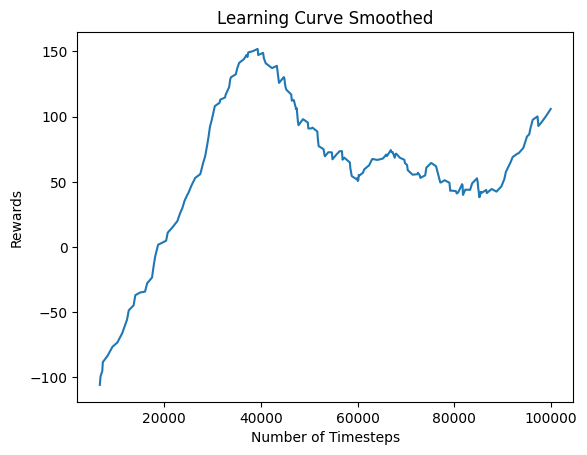

' Notice that the rewards may not reach 500.\nThis is due to looking at training rewards, not evaluation rewards.\nEvaluation has a determinstic policy, training does not.'

In [61]:
from stable_baselines3.common.results_plotter import load_results, ts2xy
import numpy as np
import matplotlib.pyplot as plt

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")

def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()

plot_results(eval_log_dir)

''' Notice that the rewards may not reach 500.
This is due to looking at training rewards, not evaluation rewards.
Evaluation has a determinstic policy, training does not.'''

In [66]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import ale_py
from IPython.display import Video

# Create Lunar Lander environment
env = gym.make('LunarLander-v3', render_mode="rgb_array")

# Set up to record a video
env = RecordVideo(env, video_folder='./video', name_prefix='cartpole')

# Reset the environment
obs, _ = env.reset()

# Run the environment until done
terminated = False
truncated = False
while not (terminated or truncated):
    action, _ = agent.predict(obs, deterministic=True)  # Choose an action from your agent
    obs, reward, terminated, truncated, info = env.step(action) # Steps the environment

env.close() # Good practice to always close the environment after completion

# Display the video within the notebook
Video("./video/cartpole-episode-0.mp4", embed=True)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


## Summary: Reward Trends, Success Rate, and Observed Behavior

Model improves steadily until around 150 where reward collapses, dropping down to 50 or so before climbing back up to 100. This collapse is likely caused by overestimated Q-values. In the environment, model seems struggle with landing when it's tossed heavily to one side. However, it does touch down on the ground within the two flags consistently, indicating the model might not have fully adapted to the new optimal policy. This should be fixed with a few thousand timesteps.

## Explanation + Lessons Learned & Improvement

Explanation:

The environment I chose was the Lunar Lander because I thought it was the coolest one. As I'll mention in more detail later in lessons learned, I tried different models, hyperparameters, as well as time steps. Through all these steps, I got a very generalized model that can handle almost every scenario, though some specific cases lead it to not land within the flags. As for why I used a DQN, it's because it performed the best out of all the agents I tried.

Lessons Learned:

I tried using other agents such as A2C and ARS but found that they did not get as good of a result as DQN did. Not 100% sure if this was due to having more limited hyperparameters than DQN did or because the policy I selected was not as good of a fit for the situation. I increased timesteps to see if the model would overestimate and lead to a bad policy, giving it moretime generalize which seemed to work well. I also tried playing around with the learning rate, trying a range of values 7.2e-4 and 1.8e-4 but ultimately settled back onto 6.3e-4 since it was giving the best general result. I also upped batch size to see if the model would learn faster with more examples but found that